## Run the sections A, B, C, D, E, F, G, H sequentially. Then the main program is ready to run and conduct experiment.

## (A) The First 2 bunch of codes are to initialize the motion controller ESP 300

In [1]:
from pymeasure.instruments.newport import ESP300
from pymeasure.instruments import list_resources

from pymeasure.display import widgets as pw
from pymeasure.display.inputs import *

import ftd2xx  # Thorlabs MFF101
import ftd2xx.defines as constants
from ftd2xx import listDevices, getDeviceInfoDetail

import pymeasure.experiment.parameters as pars

from time import sleep
from pymeasure.experiment import Procedure
from pymeasure.experiment import IntegerParameter



## (B)

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## (C) The next bunch of code should be run to initialize the Spectrometer (PrincetonInstruments Lightfield Software) 

In [17]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import clr
import sys
import os
from System.IO import *
from System import String
from System.Threading import AutoResetEvent
from System.Collections.Generic import List

# Add needed dll references
sys.path.append(os.environ['LIGHTFIELD_ROOT'])
sys.path.append(os.environ['LIGHTFIELD_ROOT']+"\\AddInViews")
clr.AddReference('PrincetonInstruments.LightFieldViewV5')
clr.AddReference('PrincetonInstruments.LightField.AutomationV5')
clr.AddReference('PrincetonInstruments.LightFieldAddInSupportServices')

# PI imports
from PrincetonInstruments.LightField.Automation import Automation
from PrincetonInstruments.LightField.AddIns import CameraSettings
from PrincetonInstruments.LightField.AddIns import ExperimentSettings
from PrincetonInstruments.LightField.AddIns import DeviceType
from PrincetonInstruments.LightField.AddIns import SpectrometerSettings

        
def save_file(filename):    
    # Set the base file name
    experiment.SetValue(
        ExperimentSettings.FileNameGenerationBaseFileName,
        Path.GetFileName(filename))
    
    # Option to Increment, set to false will not increment
    experiment.SetValue(
        ExperimentSettings.FileNameGenerationAttachIncrement,
        True)

    # Option to add date
    experiment.SetValue(
        ExperimentSettings.FileNameGenerationAttachDate,
        True)

    # Option to add time
    experiment.SetValue(
        ExperimentSettings.FileNameGenerationAttachTime,
        True)

def device_found():
    # Find connected device
    for device in experiment.ExperimentDevices:
        if (device.Type == DeviceType.Camera):
            return True
     
    # If connected device is not a camera inform the user
    print("Camera not found. Please add a camera and try again.")
    return False  



# Create the LightField Application (true for visible)
# The 2nd parameter forces LF to load with no experiment 
auto = Automation(True, List[String]())
application= auto.LightFieldApplication
experiment = auto.LightFieldApplication.Experiment
file_manager=application.FileManager


# (D) Establish connection with the ESP300 and Flipper Mirror

In [6]:
# from pymeasure.instruments.lighthousephotonics import Sprout
# laser = Sprout('COM1')
# laser.adapter.connection.baud_rate = 19200
# laser.adapter.connection.read_termination = '\r'
# laser.adapter.connection.write_termination = '\r'

# ser = b'37000805'  # flipper
ctrl = ESP300("GPIB0::3::INSTR")


ctrl.data_bits=8
ctrl.baud_rate=19200
ctrl.StopBits=1
ctrl.read_termination='\r\n'
ctrl.write_termination='\r'

# (E) Record the position of the x,y,z axes of the motion controller

In [7]:
x = ctrl.x  # Our x-axis is motor 1 or y
y = ctrl.y  # Our y-axis is motor 2 or x
z = ctrl.phi  # 3
pos = [x.position, y.position, z.position]
print(pos)
print(x.enabled,y.enabled,z.enabled)





[5.10829, 4.99374, 4.72909]
True True False


## (F) Import the flipper mirror and Laser Power controlling package**

In [8]:
from flipper import mirror
mirror('off')
from pymeasure.instruments.lighthousephotonics import Sprout
laser_power = Sprout('COM1')
laser_power.adapter.connection.baud_rate = 19200
laser_power.adapter.connection.read_termination = '\r'
laser_power.adapter.connection.write_termination = '\r'
laser_power.power=0.01

{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}


## Main Program to begin the experiment
**Here the main experiment begins**

Initializing starts

Enter the (y1,x1) coordinate
3 3
Enter the (y2,x2) coordinate
9 9
Enter the step size of y, then x
.5 .5
[3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9. ]
[3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9. ]
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}

Patterning will be started within 10 seconds


Patterning Starts

{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
experiment:  0 :Patterning not done
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'370

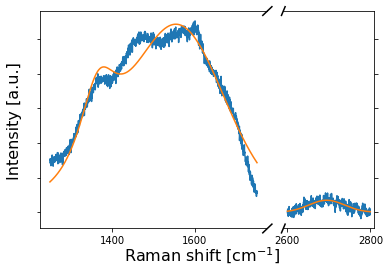

             D          PD    WD   FD    G   PG   WG   FG          2D  \
0  1395.732915  1366.34479  60.0  1.0  0.0  0.0  0.0  0.0  174.422612   

          P2D        W2D           F2D   GD  2DG  
0  2694.80349  71.431684  2.921346e-11  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


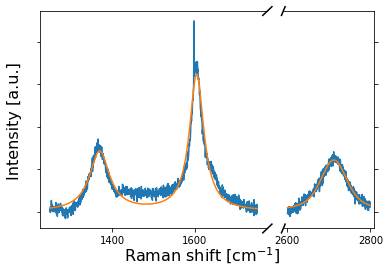

           D      PD         WD       FD          G           PG         WG  \
0  140.65845  1370.0  29.346055  0.99974  320.78644  1604.199481  21.074392   

    FG          2D          P2D        W2D      F2D        GD       2DG  
0  1.0  121.944581  2712.031233  47.028695  0.54645  2.280606  0.380143  
[2.28060554]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive nam

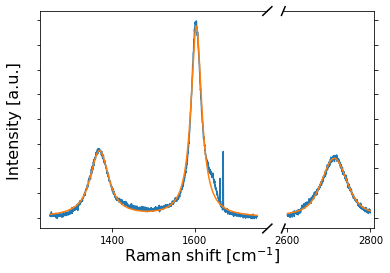

            D           PD         WD       FD           G           PG  \
0  268.420365  1369.692775  29.483442  0.80003  773.206891  1603.301909   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  15.532509  1.0  240.760149  2713.059485  45.203795  0.528876  2.880582   

        2DG  
0  0.311379  
[2.88058207]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

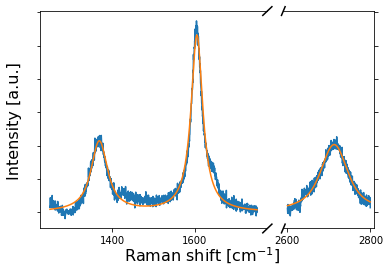

            D           PD         WD        FD           G           PG  \
0  106.049743  1369.328565  25.521077  0.878592  265.028825  1604.768178   

          WG   FG          2D          P2D        W2D      F2D        GD  \
0  17.131323  1.0  101.809809  2712.825291  44.823736  0.73278  2.499099   

        2DG  
0  0.384146  
[2.49909918]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

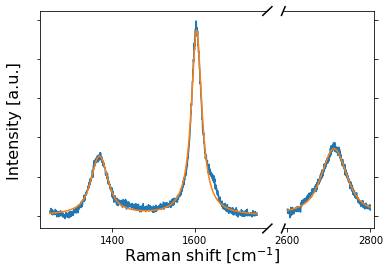

            D           PD         WD        FD           G           PG  \
0  150.644431  1369.555954  28.295165  0.702369  471.400088  1603.937837   

          WG   FG          2D         P2D        W2D      F2D        GD  \
0  15.206301  1.0  171.407572  2712.67574  43.559945  0.63712  3.129223   

        2DG  
0  0.363614  
[3.12922347]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Popul

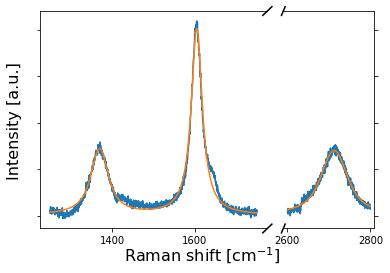

            D      PD         WD        FD           G           PG  \
0  142.530863  1370.0  27.671968  0.831306  401.121494  1604.410813   

          WG   FG          2D          P2D        W2D      F2D        GD  \
0  16.139975  1.0  139.978472  2712.768156  44.745477  0.66982  2.814278   

        2DG  
0  0.348968  
[2.81427815]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

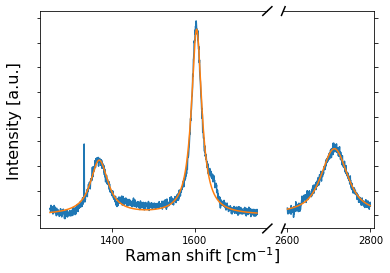

            D           PD         WD        FD           G          PG  \
0  110.285727  1369.136113  26.735035  0.922408  376.287437  1604.05714   

          WG        FG          2D          P2D        W2D       F2D  \
0  15.033913  0.999996  135.108379  2713.345278  43.830924  0.699115   

         GD       2DG  
0  3.411932  0.359056  
[3.41193233]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matp

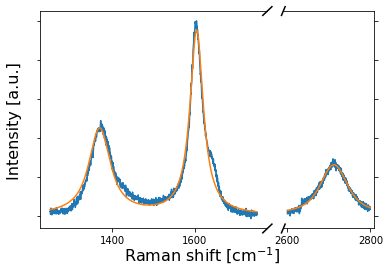

            D      PD         WD        FD           G           PG  \
0  221.857771  1370.0  33.221814  0.870533  471.999947  1604.135576   

          WG        FG          2D          P2D        W2D       F2D  \
0  19.468084  0.999999  130.465263  2712.144046  45.179718  0.728675   

         GD       2DG  
0  2.127489  0.276409  
[2.12748891]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

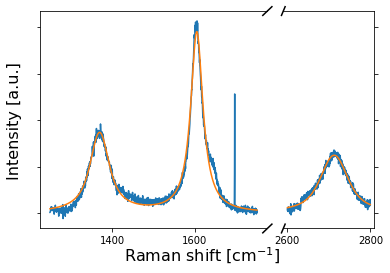

           D      PD         WD        FD           G           PG         WG  \
0  171.82859  1370.0  30.644258  0.822366  388.388322  1604.545181  17.956229   

    FG          2D          P2D        W2D       F2D        GD       2DG  
0  1.0  124.842686  2712.772396  46.926907  0.650014  2.260324  0.321438  
[2.26032421]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

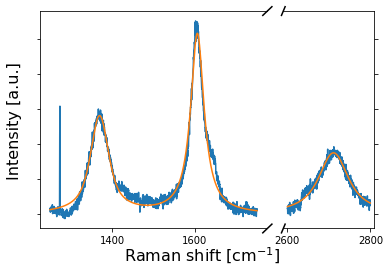

            D      PD         WD        FD       G           PG         WG  \
0  138.815145  1370.0  30.714917  0.703926  256.04  1605.833117  19.664588   

    FG         2D         P2D        W2D       F2D        GD       2DG  
0  1.0  87.649877  2711.26583  46.412076  0.854625  1.844467  0.342329  
[1.84446734]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

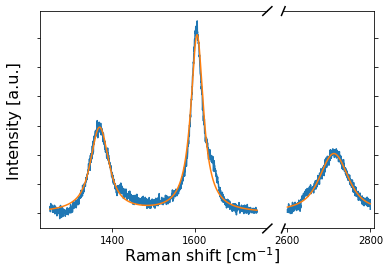

            D           PD         WD        FD           G           PG  \
0  145.463739  1369.999999  29.758745  0.755492  303.357275  1605.220663   

          WG   FG         2D         P2D        W2D       F2D        GD  \
0  18.347068  1.0  102.30483  2712.21064  48.021672  0.682639  2.085449   

        2DG  
0  0.337242  
[2.08544946]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Popul

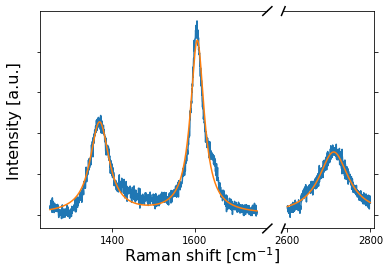

            D      PD         WD        FD           G           PG  \
0  112.320107  1370.0  28.882967  0.898798  212.468737  1605.655826   

          WG   FG         2D          P2D        W2D  F2D        GD       2DG  
0  20.031295  1.0  76.888549  2711.739857  43.250623  1.0  1.891636  0.361882  
[1.89163581]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
experiment:  13 :Patterning not done
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flip

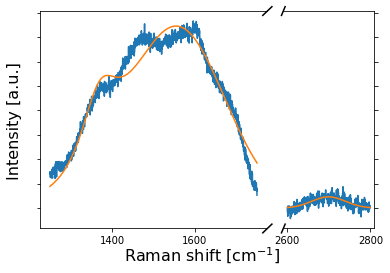

            D           PD    WD   FD    G   PG   WG   FG          2D  \
0  865.526506  1369.999871  60.0  1.0  0.0  0.0  0.0  0.0  114.793852   

           P2D        W2D           F2D   GD  2DG  
0  2699.376363  67.423134  8.931627e-10  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


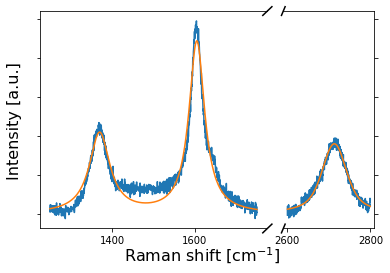

           D      PD         WD        FD           G           PG         WG  \
0  205.83191  1370.0  29.981282  0.999907  440.111754  1604.544144  23.036634   

    FG          2D          P2D        W2D      F2D       GD       2DG  
0  1.0  180.078873  2713.201859  43.641399  0.54363  2.13821  0.409166  
[2.13820954]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive n

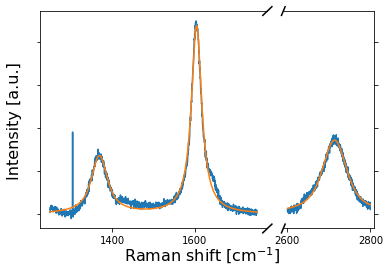

            D           PD         WD        FD           G           PG  \
0  134.938038  1369.607867  25.296707  0.853378  438.621202  1603.899292   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  15.164262  1.0  172.423832  2713.728359  41.036043  0.686791  3.250538   

        2DG  
0  0.393104  
[3.25053785]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

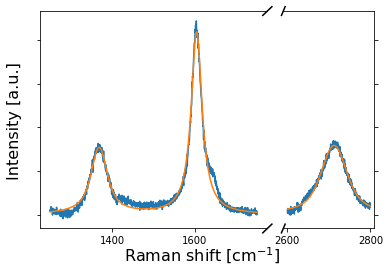

           D           PD         WD        FD           G           PG  \
0  152.07136  1368.919293  26.914077  0.758491  416.905482  1604.110422   

          WG   FG          2D          P2D        W2D      F2D        GD  \
0  15.979811  1.0  158.448986  2712.508523  45.481663  0.57112  2.741512   

       2DG  
0  0.38006  
[2.74151215]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populat

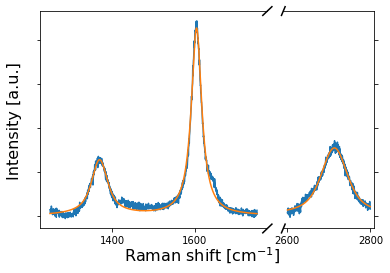

            D      PD         WD        FD          G           PG         WG  \
0  125.775058  1370.0  26.049546  0.812374  425.54317  1603.834379  15.174627   

         FG          2D          P2D        W2D       F2D        GD       2DG  
0  0.999998  154.280984  2713.238316  45.340429  0.618789  3.383367  0.362551  
[3.38336692]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the

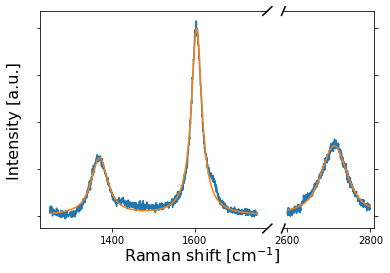

            D           PD         WD        FD           G           PG  \
0  122.013729  1369.651287  26.518838  0.811499  397.816639  1603.953889   

         WG   FG          2D          P2D        W2D      F2D        GD  \
0  15.39676  1.0  149.534875  2712.780363  44.444237  0.62605  3.260425   

        2DG  
0  0.375889  
[3.26042523]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Popul

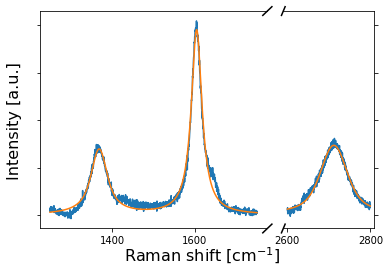

            D           PD         WD        FD           G           PG  \
0  137.633776  1368.871882  26.223961  0.810179  389.325755  1604.107228   

          WG   FG          2D         P2D       W2D     F2D        GD  \
0  15.661174  1.0  146.976641  2712.00834  47.52196  0.5513  2.828708   

        2DG  
0  0.377516  
[2.82870794]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populatin

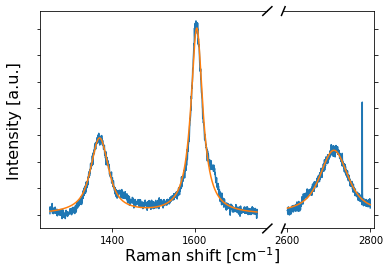

            D      PD         WD        FD           G           PG  \
0  142.715355  1370.0  29.485372  0.732197  349.375368  1604.523736   

          WG        FG          2D         P2D       W2D      F2D        GD  \
0  17.092732  0.999995  121.365824  2712.25499  46.71932  0.69785  2.448057   

        2DG  
0  0.347379  
[2.44805732]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populat

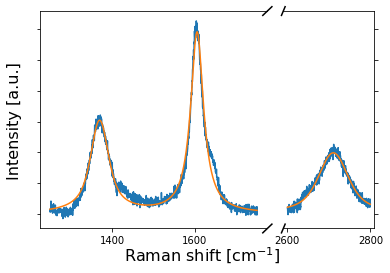

            D      PD         WD        FD          G           PG         WG  \
0  150.334561  1370.0  30.536097  0.719668  294.21123  1605.209775  18.847177   

    FG        2D          P2D        W2D       F2D        GD       2DG  
0  1.0  99.18334  2710.791565  52.030396  0.586335  1.957043  0.337116  
[1.9570432]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive na

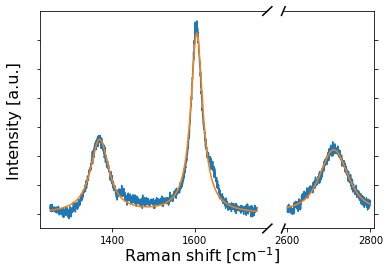

            D      PD         WD        FD           G           PG  \
0  127.303539  1370.0  29.020835  0.842585  310.412564  1604.459356   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  17.590898  1.0  111.076466  2711.923585  47.313671  0.692583  2.438366   

        2DG  
0  0.357835  
[2.43836555]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

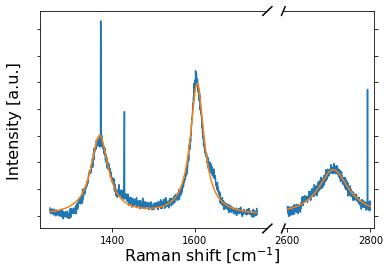

            D      PD         WD        FD           G           PG  \
0  148.648281  1370.0  25.477383  0.999996  245.598603  1605.437188   

          WG   FG         2D          P2D        W2D  F2D        GD       2DG  
0  20.171385  1.0  86.250722  2710.880634  44.355798  1.0  1.652213  0.351186  
[1.65221287]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

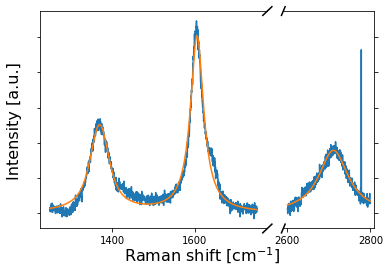

            D      PD        WD        FD           G           PG         WG  \
0  123.824322  1370.0  31.47835  0.758728  250.188889  1605.050687  19.353305   

    FG         2D          P2D       W2D  F2D        GD       2DG  
0  1.0  89.162074  2711.195895  43.15778  1.0  2.020515  0.356379  
[2.02051492]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

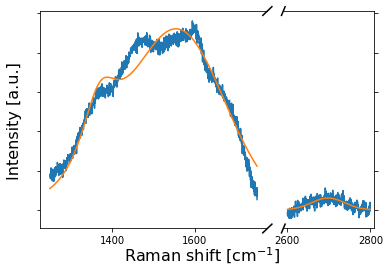

             D           PD    WD   FD    G   PG   WG   FG          2D  \
0  1095.581098  1369.999987  60.0  1.0  0.0  0.0  0.0  0.0  150.913847   

           P2D        W2D           F2D   GD  2DG  
0  2698.144068  66.019418  1.330175e-08  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


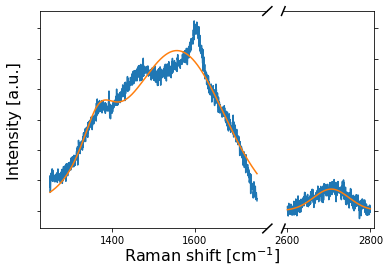

            D           PD    WD   FD    G   PG   WG   FG          2D  \
0  489.272847  1367.718533  60.0  1.0  0.0  0.0  0.0  0.0  142.371543   

           P2D        W2D           F2D   GD  2DG  
0  2705.878713  71.074498  1.205090e-08  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


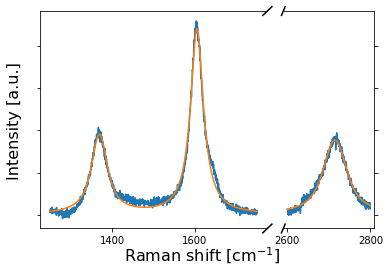

            D           PD         WD        FD           G           PG  \
0  187.773912  1369.531451  24.979813  0.866315  438.291101  1604.874887   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  18.926199  1.0  176.609873  2714.628898  39.173817  0.715247  2.334143   

        2DG  
0  0.402951  
[2.33414267]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

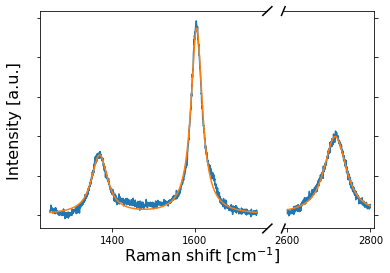

            D      PD         WD        FD           G           PG  \
0  150.531642  1370.0  24.911183  0.872907  473.317698  1604.037369   

          WG        FG          2D          P2D        W2D       F2D  \
0  16.500962  0.999981  199.429308  2715.378457  35.379249  0.781187   

         GD       2DG  
0  3.144307  0.421343  
[3.14430702]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

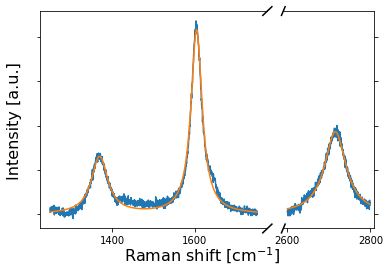

            D      PD         WD        FD           G           PG        WG  \
0  128.831752  1370.0  25.036204  0.913887  414.700619  1603.918525  16.33591   

    FG          2D          P2D       W2D  F2D        GD       2DG  
0  1.0  185.998867  2715.555913  31.34667  1.0  3.218932  0.448514  
[3.21893176]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

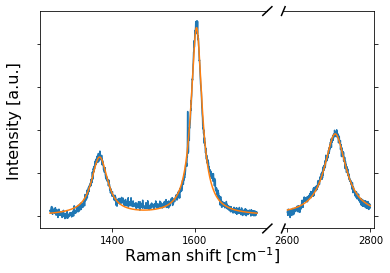

            D      PD         WD        FD           G           PG  \
0  134.282126  1370.0  25.018572  0.864148  435.977716  1603.859629   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  16.090581  1.0  190.185984  2715.315586  31.307833  1.0  3.246729  0.436229  
[3.24672932]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

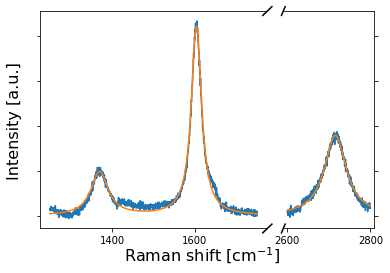

           D      PD         WD        FD           G           PG         WG  \
0  97.271524  1370.0  25.904751  0.951536  421.264786  1603.636456  15.176633   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.989931  179.796285  2715.563032  31.696454  1.0  4.330813  0.426801  
[4.33081305]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

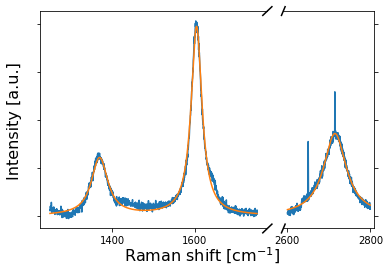

            D      PD         WD        FD           G           PG  \
0  120.232743  1370.0  25.193214  0.892026  394.474568  1603.921967   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  15.883672  1.0  172.012942  2714.699433  33.103418  1.0  3.280925  0.436056  
[3.28092463]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

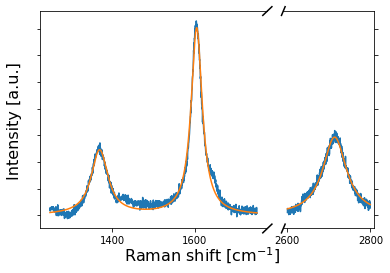

            D      PD         WD        FD           G           PG  \
0  121.531511  1370.0  25.751162  0.898793  350.854571  1604.206221   

          WG   FG          2D         P2D        W2D  F2D        GD       2DG  
0  16.353491  1.0  146.943745  2713.92564  34.550504  1.0  2.886943  0.418817  
[2.8869432]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespac

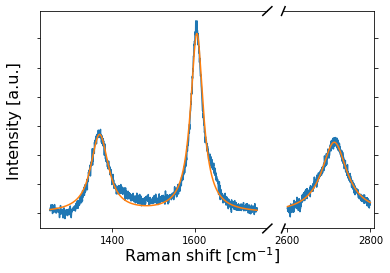

            D      PD         WD        FD           G           PG  \
0  133.657577  1370.0  27.271458  0.873491  307.000577  1604.701033   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  18.343013  1.0  122.099118  2713.138036  36.944424  1.0  2.296919  0.397716  
[2.29691863]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

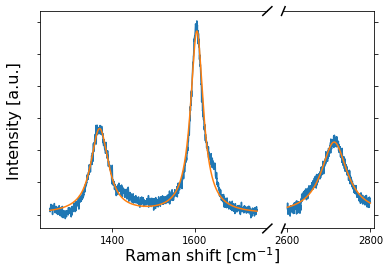

            D      PD         WD        FD           G           PG  \
0  132.542475  1370.0  27.340031  0.862504  284.901711  1604.741225   

          WG   FG          2D          P2D        W2D  F2D        GD     2DG  
0  18.500597  1.0  113.134586  2712.863416  37.677292  1.0  2.149513  0.3971  
[2.14951254]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

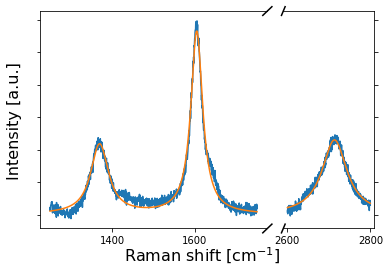

            D      PD         WD        FD           G           PG  \
0  107.569401  1370.0  27.156626  0.906283  281.414686  1604.396122   

          WG        FG          2D          P2D        W2D  F2D        GD  \
0  17.265775  0.999997  114.974471  2713.574529  36.392951  1.0  2.616122   

        2DG  
0  0.408559  
[2.61612208]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

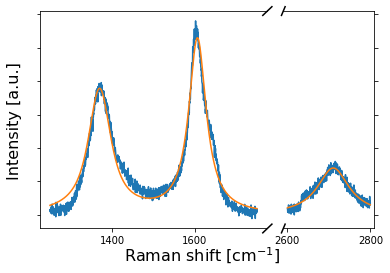

            D      PD         WD        FD           G           PG  \
0  186.442878  1370.0  35.143151  0.876111  261.547628  1606.095669   

          WG   FG         2D          P2D       W2D  F2D       GD       2DG  
0  25.456655  1.0  70.128191  2710.664742  46.62982  1.0  1.40283  0.268128  
[1.40282982]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

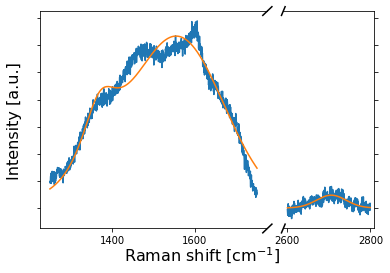

            D      PD    WD   FD    G   PG   WG   FG         2D          P2D  \
0  725.689538  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  118.09057  2705.853405   

         W2D           F2D   GD  2DG  
0  59.665315  3.895082e-09  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


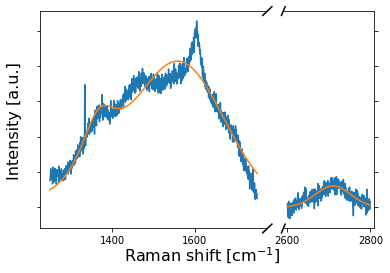

            D           PD    WD   FD    G   PG   WG   FG          2D  \
0  398.027828  1367.572716  60.0  1.0  0.0  0.0  0.0  0.0  120.518634   

           P2D        W2D           F2D   GD  2DG  
0  2709.842815  69.957731  3.670904e-07  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


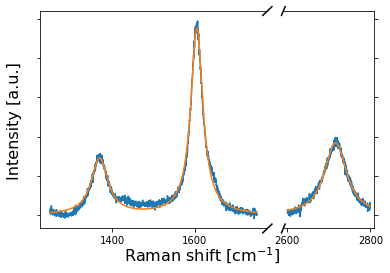

           D      PD        WD        FD           G           PG         WG  \
0  142.89478  1370.0  24.93856  0.948623  475.548169  1604.566941  17.750677   

         FG          2D          P2D        W2D       F2D       GD       2DG  
0  0.999993  184.104169  2716.026453  34.930705  0.837977  3.32796  0.387141  
[3.32796041]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the int

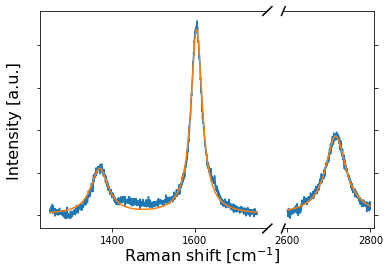

            D      PD         WD        FD           G           PG  \
0  107.504687  1370.0  26.123455  0.962535  436.786205  1603.950302   

          WG        FG          2D          P2D        W2D  F2D       GD  \
0  16.626908  0.999927  185.845395  2716.558617  29.806021  1.0  4.06295   

        2DG  
0  0.425484  
[4.06295035]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

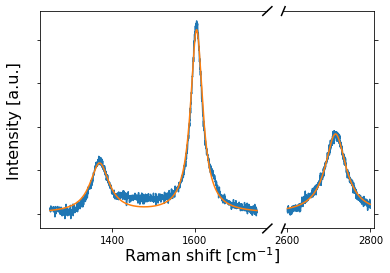

           D      PD         WD   FD           G           PG         WG  \
0  114.06944  1370.0  28.155936  1.0  422.322766  1604.095356  17.741431   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999993  183.586318  2716.120471  30.221209  1.0  3.702331  0.434706  
[3.7023305]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespac

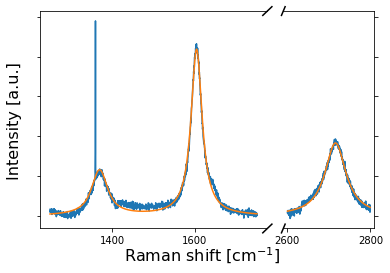

            D           PD         WD        FD           G           PG  \
0  114.101632  1369.900767  25.158242  0.858872  417.828149  1603.996188   

          WG        FG          2D          P2D        W2D  F2D        GD  \
0  16.243728  0.999999  183.347814  2716.015134  30.686305  1.0  3.661895   

        2DG  
0  0.438812  
[3.66189459]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

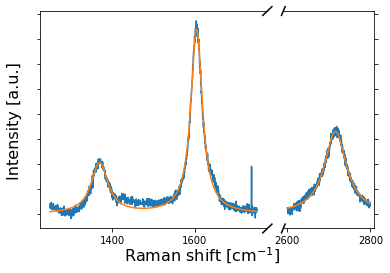

            D      PD         WD        FD          G           PG         WG  \
0  101.029181  1370.0  25.054366  0.955599  367.97737  1604.010703  17.031399   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.990829  164.885455  2715.914521  32.119712  1.0  3.642288  0.448086  
[3.64228797]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

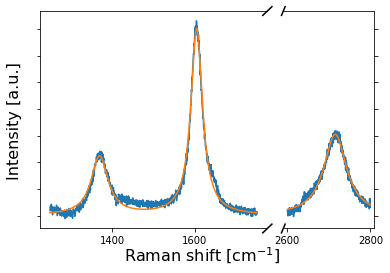

            D      PD         WD        FD           G           PG  \
0  110.334134  1370.0  25.426338  0.936037  350.100673  1604.192813   

          WG        FG          2D          P2D       W2D  F2D        GD  \
0  17.148938  0.999759  152.519209  2715.305985  33.13549  1.0  3.173095   

        2DG  
0  0.435644  
[3.17309486]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

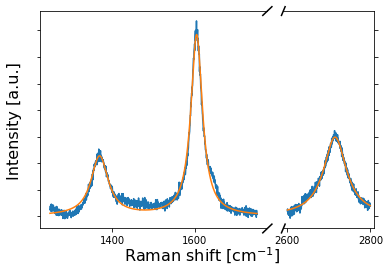

            D      PD         WD        FD           G          PG         WG  \
0  112.024193  1370.0  25.812752  0.937833  341.092819  1604.12602  16.927793   

    FG          2D          P2D       W2D  F2D        GD       2DG  
0  1.0  149.060701  2714.940802  33.27658  1.0  3.044814  0.437009  
[3.04481388]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

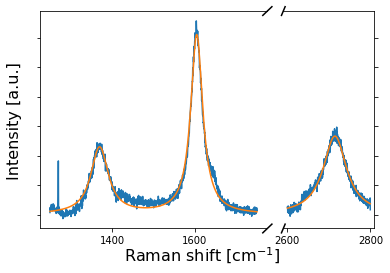

            D      PD         WD        FD          G           PG         WG  \
0  113.536798  1370.0  26.667268  0.905525  304.64515  1604.339757  17.596697   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  133.392515  2714.653671  34.175401  1.0  2.683228  0.437862  
[2.6832283]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespac

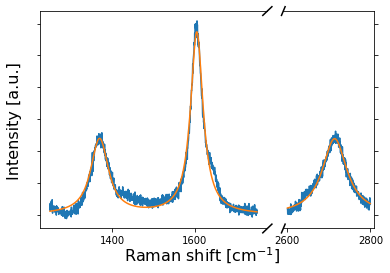

            D      PD         WD        FD           G           PG  \
0  118.408066  1370.0  27.289953  0.883557  285.692976  1604.537682   

          WG        FG          2D          P2D        W2D  F2D        GD  \
0  18.249272  0.999999  119.556341  2713.936783  36.046304  1.0  2.412783   

        2DG  
0  0.418478  
[2.41278305]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

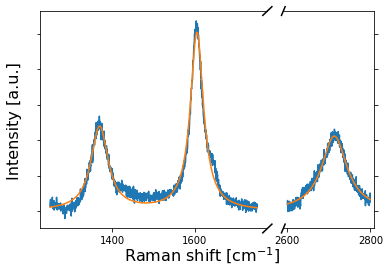

            D      PD         WD        FD           G           PG  \
0  118.142612  1370.0  26.153877  0.924143  250.910507  1604.826101   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  19.253192  1.0  105.798415  2713.213909  37.125216  1.0  2.123793  0.421658  
[2.12379346]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

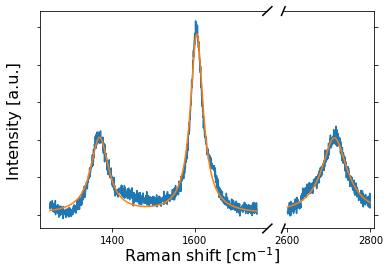

            D      PD         WD        FD           G           PG  \
0  101.566934  1370.0  27.198465  0.933941  239.741704  1604.484183   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  18.729255  1.0  102.521556  2713.454412  37.077098  1.0  2.360431  0.427633  
[2.36043065]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

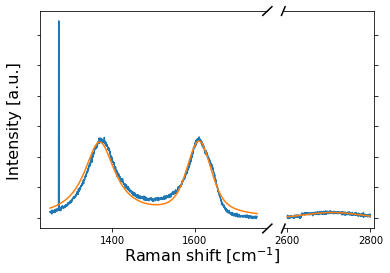

            D      PD        WD   FD           G           PG         WG  \
0  489.031534  1370.0  45.40175  1.0  486.931081  1609.917246  44.530363   

         FG         2D          P2D         W2D           F2D        GD  \
0  0.504842  36.697122  2708.237746  106.272899  3.594213e-07  0.995705   

        2DG  
0  0.075364  
[0.99570487]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Popul

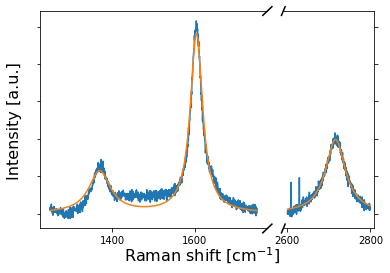

            D      PD         WD   FD           G           PG         WG  \
0  112.283419  1370.0  31.525295  1.0  479.950814  1603.603073  18.059273   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999999  198.319208  2716.060317  28.891622  1.0  4.274458  0.413207  
[4.27445848]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

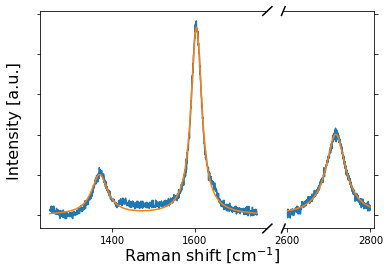

           D      PD         WD       FD           G           PG         WG  \
0  99.281021  1370.0  24.098222  0.98446  465.357816  1603.654721  16.183359   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.943161  201.288974  2716.692382  28.503938  1.0  4.687279  0.432547  
[4.6872787]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive 

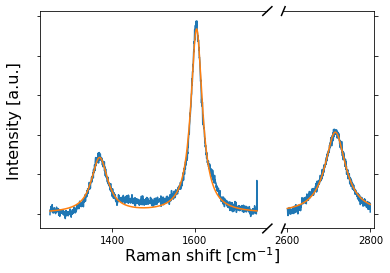

            D      PD         WD       FD           G           PG         WG  \
0  139.711034  1370.0  24.898577  0.90857  466.413265  1603.972728  16.807296   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999986  206.235446  2715.574514  29.922821  1.0  3.338414  0.442173  
[3.33841396]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

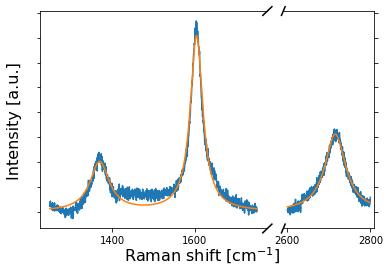

           D      PD         WD        FD           G           PG         WG  \
0  99.213524  1370.0  28.134086  0.999731  352.729985  1603.870181  18.458352   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  156.100864  2715.571418  30.431916  1.0  3.555261  0.442551  
[3.55526113]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

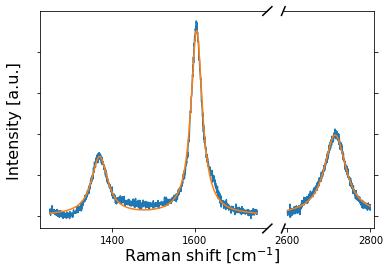

           D      PD         WD        FD           G           PG         WG  \
0  141.85634  1370.0  25.101573  0.889079  449.978415  1603.997814  16.658737   

    FG          2D          P2D        W2D       F2D        GD       2DG  
0  1.0  196.813414  2715.094957  33.230434  0.876032  3.172071  0.437384  
[3.17207123]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

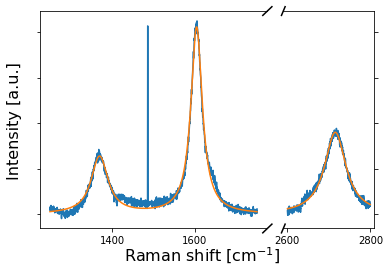

            D      PD         WD        FD           G           PG  \
0  126.142294  1370.0  25.570712  0.919195  410.694566  1604.031439   

          WG        FG          2D          P2D        W2D       F2D  \
0  16.648443  0.999976  180.380358  2715.505728  31.058323  0.999995   

         GD       2DG  
0  3.255804  0.439208  
[3.25580384]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

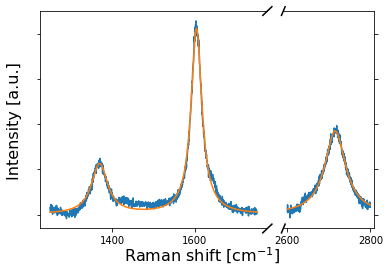

            D      PD       WD       FD           G           PG         WG  \
0  111.077615  1370.0  24.1962  0.93827  410.323685  1603.770802  16.086945   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.988483  184.480035  2715.396059  30.299356  1.0  3.694027  0.449596  
[3.69402679]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive n

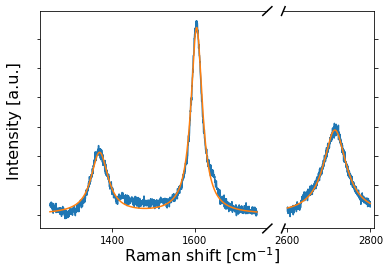

            D      PD         WD       FD           G          PG         WG  \
0  104.739378  1370.0  26.040882  0.90213  318.177139  1604.14268  16.653974   

         FG          2D          P2D      W2D  F2D        GD       2DG  
0  0.999998  144.390377  2714.522366  33.3561  1.0  3.037799  0.453805  
[3.03779861]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive nam

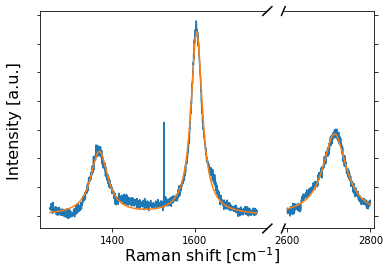

            D           PD         WD        FD           G           PG  \
0  110.452884  1369.220522  26.303771  0.890284  320.109208  1604.066834   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  16.445343  1.0  142.657806  2713.889581  34.030686  1.0  2.898152  0.445654  
[2.89815165]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interac

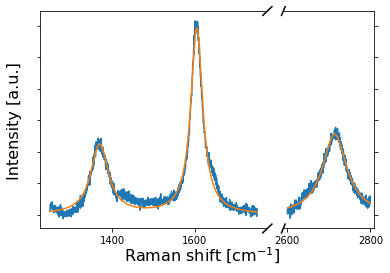

            D      PD         WD        FD           G           PG  \
0  110.652081  1370.0  26.824428  0.911628  295.125216  1604.358573   

          WG        FG          2D          P2D        W2D  F2D        GD  \
0  17.476535  0.999999  127.816574  2714.004783  35.418841  1.0  2.667146   

        2DG  
0  0.433093  
[2.66714564]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

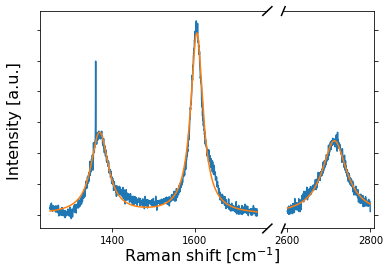

            D      PD         WD        FD           G           PG        WG  \
0  132.288429  1370.0  26.774898  0.868111  293.406916  1604.507989  17.97564   

    FG          2D          P2D       W2D  F2D        GD       2DG  
0  1.0  120.188639  2713.360003  35.94788  1.0  2.217933  0.409631  
[2.21793334]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

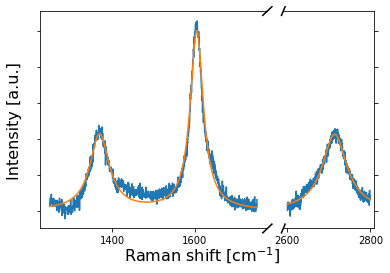

            D      PD        WD        FD           G           PG         WG  \
0  105.592923  1370.0  28.23374  0.995929  248.615172  1604.426905  19.196194   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999999  106.384256  2713.967087  35.848313  1.0  2.354468  0.427907  
[2.35446814]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

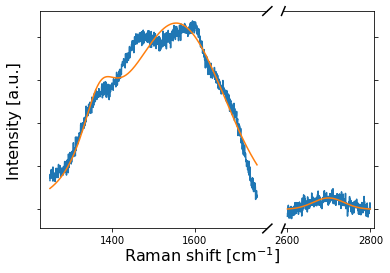

            D      PD    WD   FD    G   PG   WG   FG          2D          P2D  \
0  987.110186  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  132.711597  2699.300766   

         W2D           F2D   GD  2DG  
0  62.601453  2.469852e-11  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


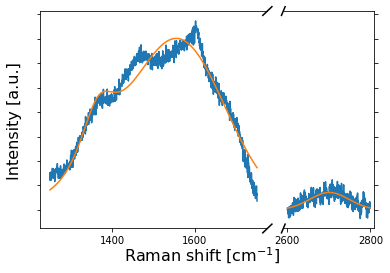

            D           PD    WD   FD    G   PG   WG   FG          2D  \
0  618.774836  1366.025289  60.0  1.0  0.0  0.0  0.0  0.0  141.722111   

           P2D        W2D           F2D   GD  2DG  
0  2701.209423  78.175175  3.212425e-11  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


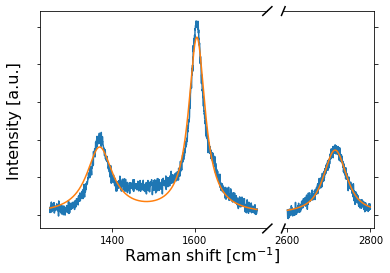

            D      PD         WD   FD           G          PG         WG   FG  \
0  175.747084  1370.0  37.945874  1.0  468.202472  1604.64073  24.224604  1.0   

          2D          P2D        W2D       F2D       GD       2DG  
0  172.45696  2715.185099  37.721324  0.737685  2.66407  0.368338  
[2.66406964]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

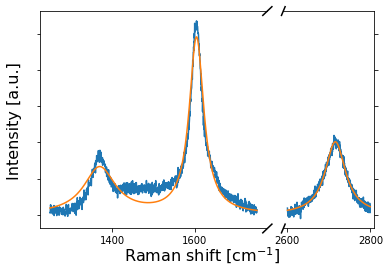

            D      PD         WD   FD           G           PG         WG  \
0  129.411445  1370.0  46.733061  1.0  486.724059  1603.821511  21.432242   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  201.847767  2715.713612  29.854084  1.0  3.761059  0.414707  
[3.76105885]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from 

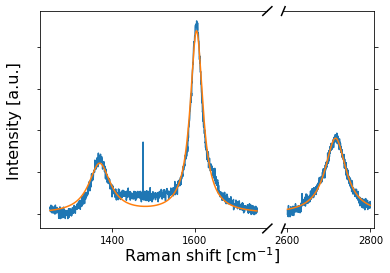

            D      PD         WD   FD           G           PG         WG  \
0  119.080578  1370.0  31.650847  1.0  435.571152  1603.893895  18.622472   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  181.493339  2716.100185  30.404408  1.0  3.657785  0.416679  
[3.657785]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from nu

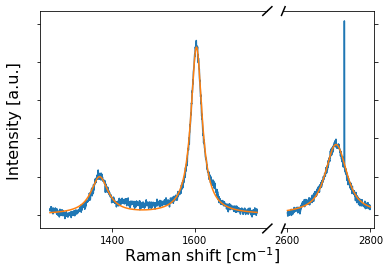

          D      PD         WD        FD           G          PG         WG  \
0  97.40885  1370.0  25.597273  0.997771  438.518304  1603.68205  16.331552   

         FG          2D          P2D        W2D       F2D        GD       2DG  
0  0.999938  183.904094  2717.390419  35.121616  0.716313  4.501832  0.419376  
[4.50183227]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the int

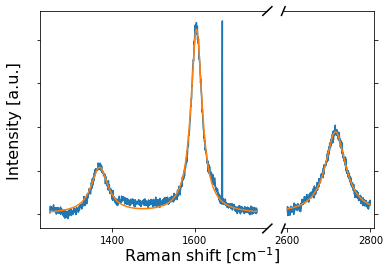

            D           PD         WD        FD           G           PG  \
0  105.344406  1369.999999  25.405477  0.952449  423.662501  1603.829922   

          WG        FG          2D          P2D        W2D  F2D       GD  \
0  16.485398  0.993969  188.873713  2715.999229  29.723081  1.0  4.02169   

        2DG  
0  0.445812  
[4.02168961]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

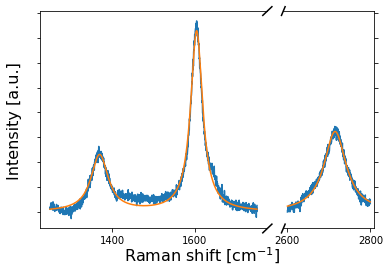

            D      PD         WD        FD           G           PG  \
0  113.594023  1370.0  25.908753  0.939195  362.915857  1604.126533   

          WG   FG          2D         P2D        W2D  F2D       GD      2DG  
0  17.567812  1.0  161.729875  2715.08476  32.158664  1.0  3.19485  0.44564  
[3.19484993]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

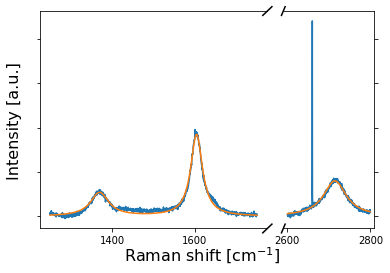

            D      PD         WD        FD           G           PG  \
0  106.996417  1370.0  27.210766  0.970567  369.129611  1603.901167   

          WG        FG          2D          P2D        W2D  F2D        GD  \
0  17.147251  0.999978  160.636963  2714.507958  33.452186  1.0  3.449925   

        2DG  
0  0.435178  
[3.44992497]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

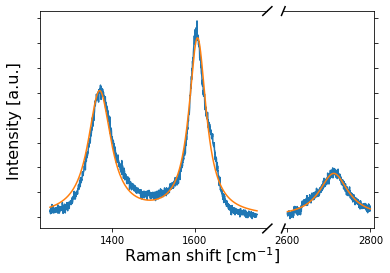

            D      PD         WD        FD           G           PG  \
0  250.535794  1370.0  34.380559  0.947715  355.804956  1606.277421   

          WG   FG         2D          P2D        W2D  F2D        GD       2DG  
0  25.293801  1.0  88.000686  2711.840473  42.280126  1.0  1.420176  0.247328  
[1.42017614]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

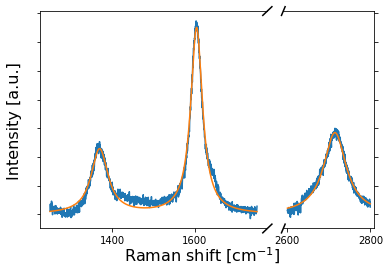

            D      PD         WD        FD           G           PG  \
0  112.879128  1370.0  25.478426  0.938508  324.427437  1603.997314   

          WG        FG          2D          P2D        W2D  F2D        GD  \
0  17.244054  0.999984  142.511417  2714.661422  32.961943  1.0  2.874114   

        2DG  
0  0.439271  
[2.8741136]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating t

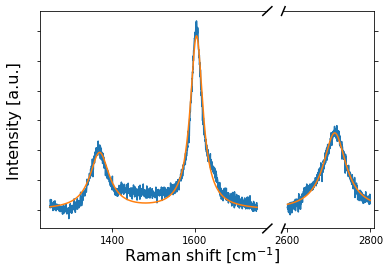

           D      PD        WD        FD           G           PG         WG  \
0  94.981476  1370.0  28.56559  0.996389  289.999091  1603.857842  18.495124   

    FG          2D          P2D        W2D  F2D        GD      2DG  
0  1.0  129.258348  2714.116592  33.116219  1.0  3.053217  0.44572  
[3.05321736]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

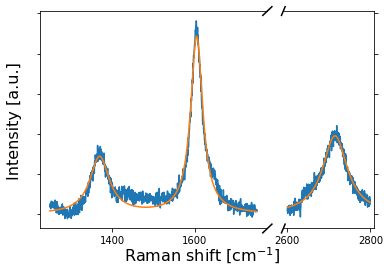

           D      PD         WD        FD           G           PG         WG  \
0  71.085527  1370.0  28.563938  0.997594  220.346223  1604.270766  17.909194   

         FG         2D          P2D        W2D  F2D        GD       2DG  
0  0.999997  97.840923  2714.794647  35.983115  1.0  3.099734  0.444033  
[3.09973397]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive

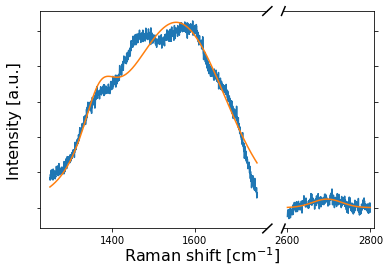

             D      PD    WD   FD    G   PG   WG   FG          2D  \
0  1176.633967  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  120.600989   

           P2D        W2D           F2D   GD  2DG  
0  2695.997963  58.882313  1.614430e-08  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


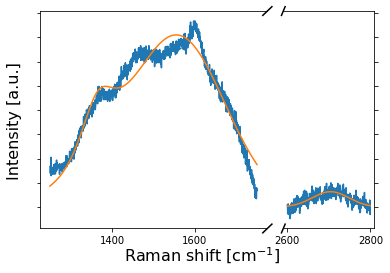

            D           PD    WD   FD    G   PG   WG   FG          2D  \
0  644.722751  1365.389473  60.0  1.0  0.0  0.0  0.0  0.0  127.098474   

           P2D        W2D           F2D   GD  2DG  
0  2704.102434  73.270765  3.883985e-09  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


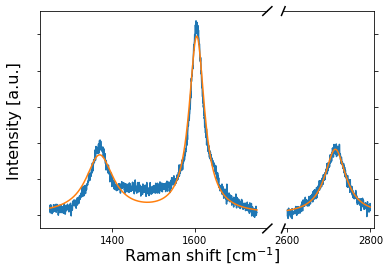

            D      PD         WD   FD           G           PG         WG  \
0  161.785729  1370.0  40.432013  1.0  490.818435  1604.450977  22.579232   

    FG          2D          P2D        W2D  F2D        GD      2DG  
0  1.0  181.671511  2715.635565  30.821108  1.0  3.033756  0.37014  
[3.03375606]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from nu

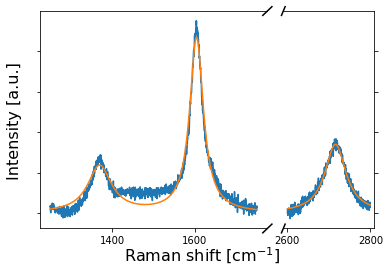

            D      PD         WD   FD           G           PG         WG  \
0  115.837659  1370.0  34.731163  1.0  431.690004  1603.910015  20.089537   

         FG         2D          P2D        W2D  F2D        GD       2DG  
0  0.999991  169.85447  2715.963999  30.729002  1.0  3.726681  0.393464  
[3.72668102]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

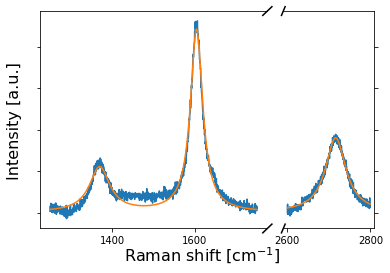

            D      PD         WD   FD           G           PG        WG  \
0  108.494433  1370.0  29.649497  1.0  440.975317  1603.919227  18.05241   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999994  180.227402  2716.394833  29.764631  1.0  4.064497  0.408702  
[4.06449717]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

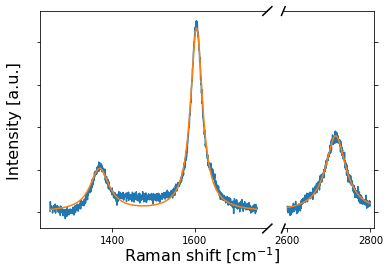

            D      PD         WD        FD           G           PG  \
0  100.753102  1370.0  27.984532  0.994637  433.115627  1603.875337   

          WG       FG          2D          P2D        W2D       F2D        GD  \
0  17.622246  0.99999  179.752608  2716.474451  29.570168  0.999997  4.298782   

        2DG  
0  0.415022  
[4.29878206]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

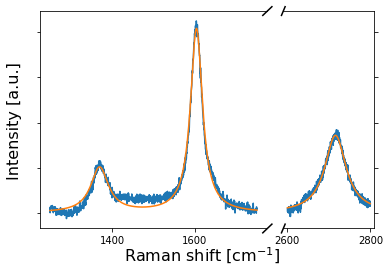

           D      PD         WD        FD           G           PG         WG  \
0  99.755783  1370.0  26.079549  0.987642  407.452507  1603.732099  17.599481   

         FG          2D         P2D        W2D  F2D      GD       2DG  
0  0.999548  171.913308  2715.92616  31.026102  1.0  4.0845  0.421922  
[4.08450012]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive nam

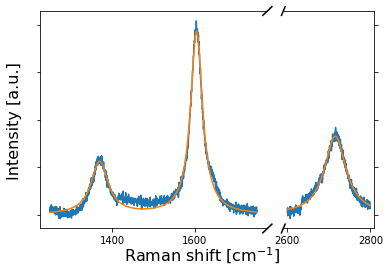

            D      PD        WD        FD           G           PG         WG  \
0  110.859083  1370.0  25.50242  0.952932  385.417735  1603.963895  17.590083   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999981  165.754833  2715.401386  31.249428  1.0  3.476646  0.430065  
[3.47664553]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

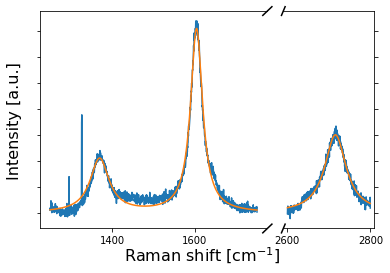

            D      PD         WD        FD           G          PG         WG  \
0  103.621632  1370.0  27.732566  0.999998  353.210603  1603.90183  17.638688   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999995  150.206872  2715.829113  31.313295  1.0  3.408657  0.425262  
[3.408657]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive

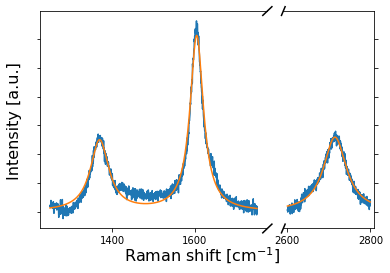

            D      PD         WD        FD           G           PG        WG  \
0  123.275681  1370.0  27.239057  0.989122  304.644779  1604.288706  19.61821   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  129.786655  2714.692848  33.442094  1.0  2.471248  0.426026  
[2.47124798]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

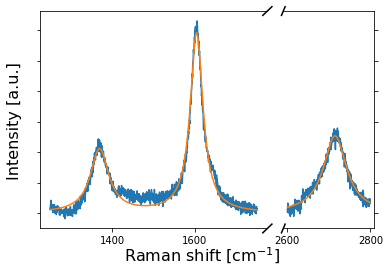

            D      PD         WD        FD           G           PG  \
0  104.054423  1370.0  27.181592  0.973391  294.224969  1604.090296   

          WG   FG          2D         P2D       W2D  F2D        GD       2DG  
0  18.768187  1.0  126.628704  2714.86758  33.71982  1.0  2.827607  0.430381  
[2.82760655]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

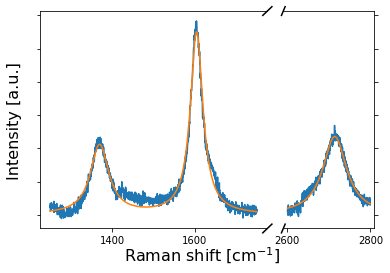

            D           PD         WD        FD         G           PG  \
0  104.476352  1369.999999  27.356905  0.959556  274.2161  1604.105732   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  18.481752  1.0  117.868141  2714.190564  34.724395  1.0  2.624671  0.429837  
[2.62467147]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive

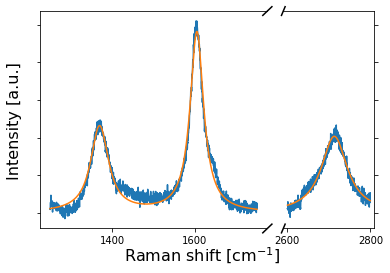

            D      PD         WD        FD           G           PG  \
0  114.325378  1370.0  27.147014  0.918223  239.576067  1604.687467   

          WG        FG          2D         P2D        W2D  F2D        GD  \
0  19.790532  0.999996  101.772482  2713.14472  37.911758  1.0  2.095563   

        2DG  
0  0.424802  
[2.0955633]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the

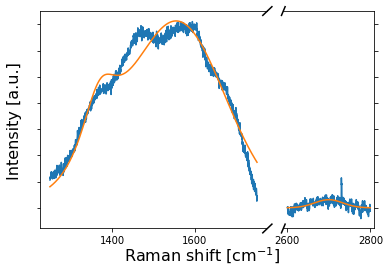

            D      PD    WD   FD    G   PG   WG   FG         2D          P2D  \
0  1613.48085  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  155.53229  2699.741126   

         W2D           F2D   GD  2DG  
0  56.835929  1.044392e-09  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


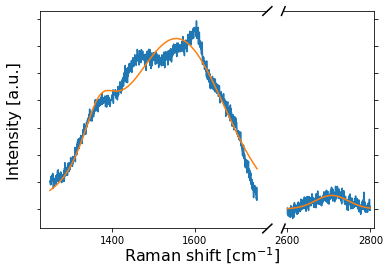

            D           PD    WD   FD    G   PG   WG   FG          2D  \
0  693.203625  1369.530939  60.0  1.0  0.0  0.0  0.0  0.0  124.956968   

           P2D        W2D           F2D   GD  2DG  
0  2707.015915  65.581892  7.589221e-09  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


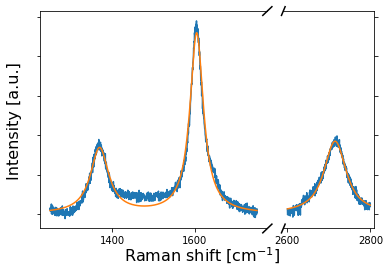

            D      PD         WD        FD           G           PG  \
0  166.031808  1370.0  26.858019  0.985964  458.205444  1604.239715   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  19.754257  1.0  184.958318  2715.035263  34.135325  0.877716  2.759745   

        2DG  
0  0.403658  
[2.75974496]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

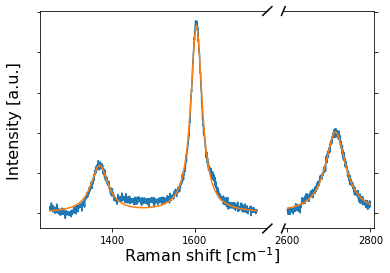

            D      PD         WD        FD           G           PG  \
0  116.786129  1370.0  25.845019  0.958182  465.481874  1603.650347   

          WG        FG         2D          P2D        W2D  F2D        GD  \
0  16.550695  0.999823  202.46222  2716.067374  29.629146  1.0  3.985763   

        2DG  
0  0.434952  
[3.98576337]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

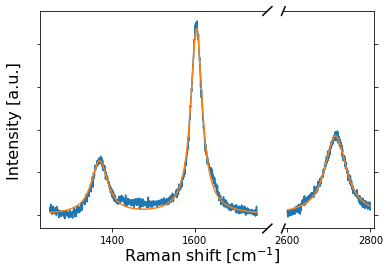

            D      PD         WD        FD           G           PG  \
0  125.361326  1370.0  24.970273  0.929861  436.178231  1603.794175   

          WG        FG          2D          P2D        W2D       F2D  \
0  17.029697  0.999968  185.677639  2716.072023  33.256391  0.852078   

         GD       2DG  
0  3.479368  0.425692  
[3.47936836]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

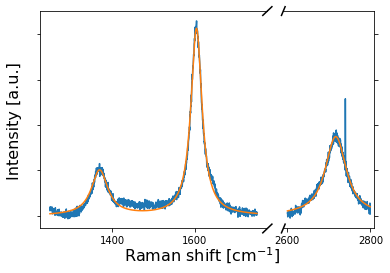

           D      PD         WD        FD           G           PG         WG  \
0  99.344855  1370.0  24.471957  0.970634  412.011362  1603.651345  16.387803   

        FG          2D          P2D       W2D       F2D        GD       2DG  
0  0.97961  174.613322  2716.693028  32.21928  0.881646  4.147284  0.423807  
[4.14728435]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the int

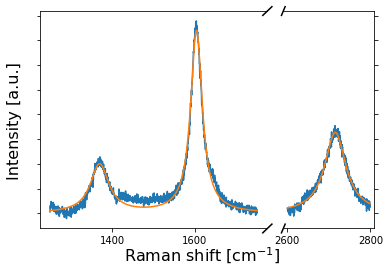

           D      PD         WD        FD           G           PG         WG  \
0  98.597403  1370.0  27.232217  0.977699  369.232383  1603.733308  17.125825   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999989  163.737432  2715.480858  31.003615  1.0  3.744849  0.443454  
[3.74484896]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interacti

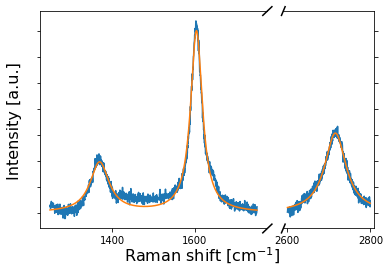

           D      PD         WD        FD           G           PG         WG  \
0  96.525371  1370.0  27.988128  0.988475  349.645049  1603.763738  17.283219   

    FG         2D          P2D        W2D  F2D        GD       2DG  
0  1.0  153.70528  2715.717927  31.177433  1.0  3.622312  0.439604  
[3.62231243]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

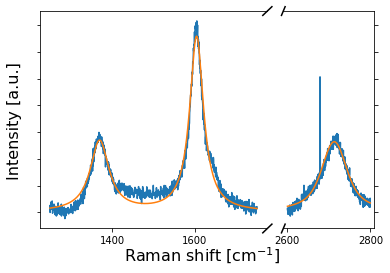

            D      PD         WD        FD           G           PG  \
0  132.579853  1370.0  27.529984  0.995083  327.692427  1604.041927   

          WG   FG          2D          P2D       W2D       F2D        GD  \
0  20.265563  1.0  131.961577  2713.014008  43.32306  0.654098  2.471661   

      2DG  
0  0.4027  
[2.47166082]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the in

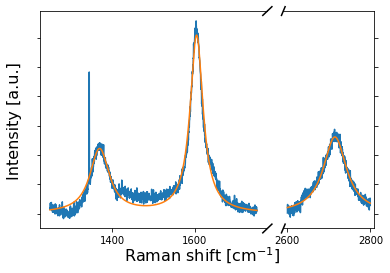

            D      PD        WD      FD           G           PG         WG  \
0  109.381227  1370.0  29.31901  0.9324  303.184977  1604.033879  19.079177   

    FG         2D          P2D        W2D  F2D        GD      2DG  
0  1.0  131.07004  2714.634684  33.983972  1.0  2.771819  0.43231  
[2.77181912]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from 

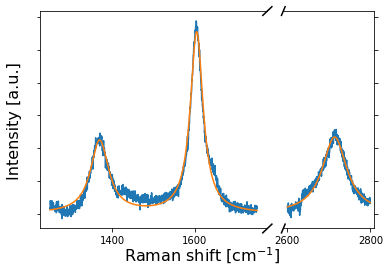

            D      PD         WD        FD           G           PG  \
0  110.861765  1370.0  27.135585  0.956375  276.434628  1604.252759   

          WG   FG         2D         P2D       W2D  F2D        GD       2DG  
0  18.714188  1.0  117.16647  2713.85173  35.79797  1.0  2.493507  0.423849  
[2.49350738]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

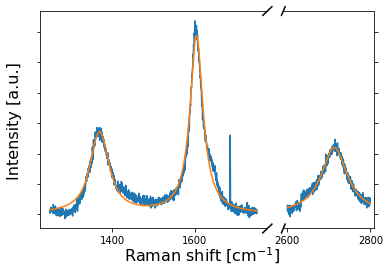

            D      PD         WD        FD           G           PG  \
0  133.568182  1370.0  30.660458  0.795314  292.513041  1603.772481   

          WG        FG          2D          P2D        W2D  F2D       GD  \
0  19.033161  0.999999  109.787204  2713.085531  37.979386  1.0  2.18999   

        2DG  
0  0.375324  
[2.18999043]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

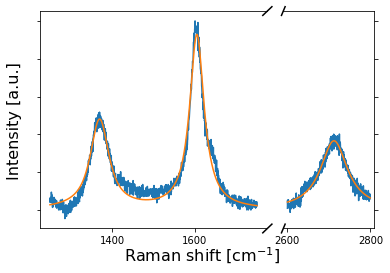

            D      PD         WD        FD           G           PG  \
0  118.337018  1370.0  28.861131  0.893131  230.844622  1604.717848   

          WG   FG         2D          P2D       W2D  F2D        GD       2DG  
0  21.198787  1.0  91.399055  2712.405096  39.71035  1.0  1.950739  0.395933  
[1.95073888]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

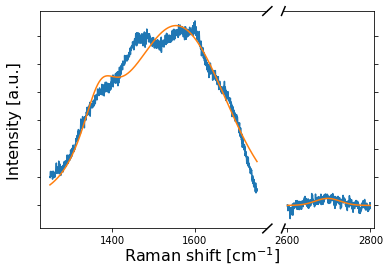

             D      PD    WD   FD    G   PG   WG   FG          2D  \
0  1457.021929  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  124.350534   

           P2D        W2D           F2D   GD  2DG  
0  2697.277261  50.350912  2.063283e-11  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


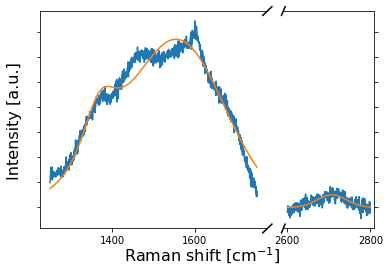

            D      PD    WD   FD    G   PG   WG   FG          2D          P2D  \
0  778.484441  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  127.013526  2707.279177   

         W2D           F2D   GD  2DG  
0  58.733946  4.974704e-11  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


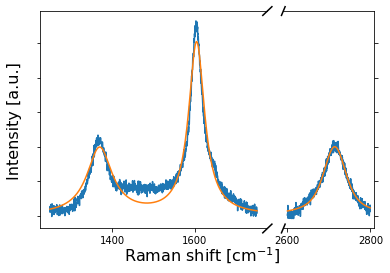

           D      PD         WD   FD           G           PG         WG   FG  \
0  194.26717  1370.0  37.107437  1.0  499.917986  1604.009888  23.412504  1.0   

          2D        P2D        W2D       F2D        GD       2DG  
0  200.15432  2714.2131  38.698773  0.674649  2.573353  0.400374  
[2.5733529]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from

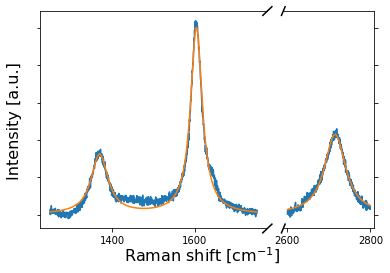

            D      PD         WD        FD           G           PG  \
0  159.932756  1370.0  25.194307  0.943973  499.787313  1603.600837   

          WG        FG          2D          P2D        W2D       F2D  \
0  17.317306  0.999998  215.194489  2715.016258  32.252972  0.908742   

         GD       2DG  
0  3.124984  0.430572  
[3.12498406]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

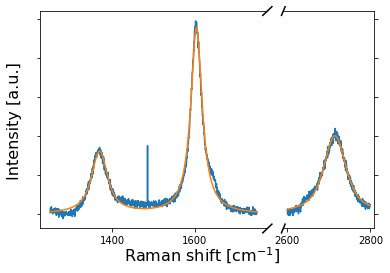

            D           PD         WD        FD           G           PG  \
0  159.640474  1369.859232  25.747584  0.804987  477.440334  1603.684354   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  16.645055  1.0  201.645551  2714.551394  37.409457  0.692129  2.990722   

        2DG  
0  0.422347  
[2.99072236]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
P

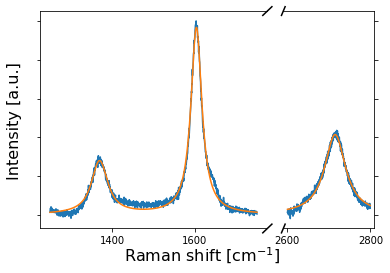

           D           PD         WD        FD           G           PG  \
0  137.76519  1369.999999  25.215248  0.878891  483.327583  1603.565864   

          WG        FG          2D          P2D        W2D       F2D  \
0  16.087921  0.999997  207.333478  2715.074629  30.538635  0.999998   

         GD       2DG  
0  3.508343  0.428971  
[3.50834331]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matp

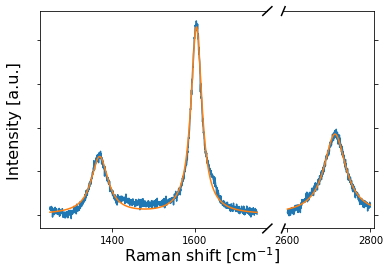

           D           PD         WD        FD           G           PG  \
0  131.60235  1369.999995  25.653771  0.915539  428.711173  1603.616038   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  16.171565  1.0  184.957157  2714.735047  32.309777  0.967603  3.257626   

        2DG  
0  0.431426  
[3.25762551]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

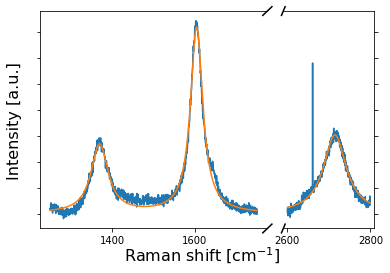

            D      PD        WD        FD           G           PG        WG  \
0  132.218624  1370.0  25.69005  0.938938  357.535884  1604.071624  18.00725   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999996  151.278756  2714.546773  33.381288  1.0  2.704126  0.423115  
[2.70412649]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive

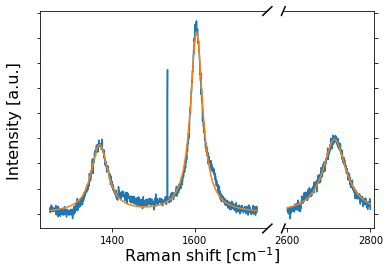

            D      PD         WD        FD           G           PG  \
0  135.567106  1370.0  26.101996  0.874241  361.038731  1603.909225   

          WG        FG          2D         P2D        W2D  F2D        GD  \
0  17.794261  0.999993  148.434489  2713.81175  33.465266  1.0  2.663174   

        2DG  
0  0.411132  
[2.66317356]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

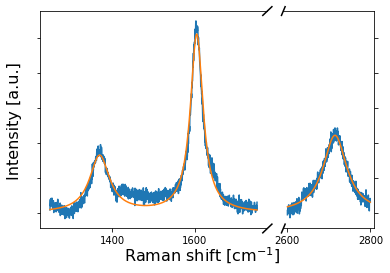

           D      PD         WD        FD           G           PG         WG  \
0  81.351244  1370.0  29.258683  0.999999  254.420094  1604.317379  18.635162   

         FG          2D          P2D        W2D  F2D        GD       2DG  
0  0.999998  111.205273  2714.855539  34.518576  1.0  3.127427  0.437093  
[3.1274272]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactiv

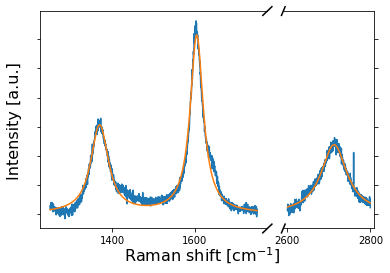

            D      PD        WD        FD           G           PG         WG  \
0  151.132046  1370.0  27.35856  0.871304  305.793992  1604.325337  19.172713   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  118.995956  2712.609123  37.998293  1.0  2.023356  0.389138  
[2.02335639]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

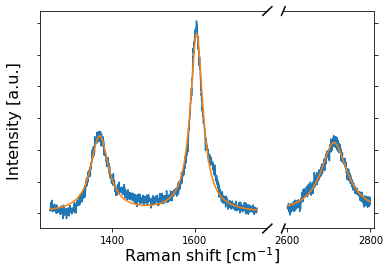

            D      PD         WD        FD           G           PG  \
0  120.284385  1370.0  27.547746  0.897385  281.191959  1604.021428   

          WG   FG          2D          P2D        W2D  F2D        GD       2DG  
0  18.539381  1.0  111.418945  2712.541159  38.144253  1.0  2.337726  0.396238  
[2.33772621]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

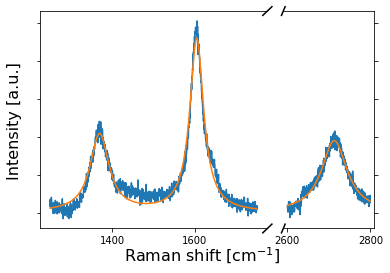

            D      PD         WD        FD           G           PG  \
0  102.763003  1370.0  28.066805  0.968606  228.722417  1604.325654   

          WG        FG         2D          P2D       W2D  F2D        GD  \
0  20.282904  0.999999  94.893254  2713.164679  37.49196  1.0  2.225727   

        2DG  
0  0.414884  
[2.22572726]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the 

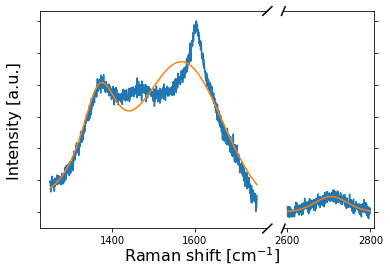

            D      PD    WD   FD    G   PG   WG   FG         2D          P2D  \
0  719.866141  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  95.885241  2705.716182   

         W2D           F2D   GD  2DG  
0  65.553199  2.592970e-10  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


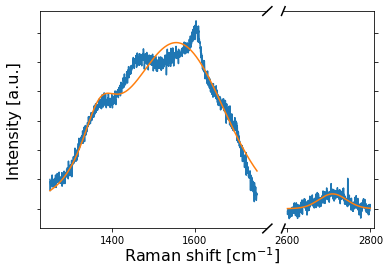

            D           PD    WD   FD    G   PG   WG   FG          2D  \
0  636.691421  1369.999907  60.0  1.0  0.0  0.0  0.0  0.0  125.599856   

           P2D        W2D           F2D   GD  2DG  
0  2709.209485  55.603036  1.029200e-09  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


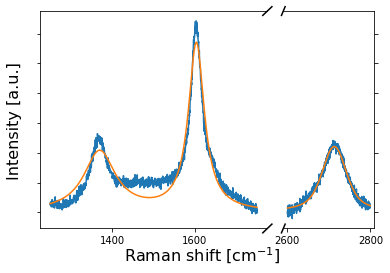

            D      PD         WD   FD           G           PG         WG  \
0  202.930919  1370.0  46.535671  1.0  562.891765  1603.461399  23.371965   

    FG          2D          P2D        W2D       F2D       GD       2DG  
0  1.0  220.736863  2713.053997  43.719775  0.493592  2.77381  0.392148  
[2.77380976]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

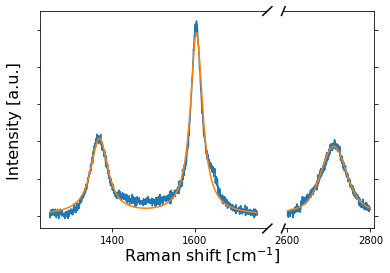

            D           PD         WD        FD           G           PG  \
0  205.642178  1369.488134  26.740993  0.870797  491.501061  1603.633011   

          WG   FG          2D          P2D       W2D      F2D        GD  \
0  17.844811  1.0  186.955021  2711.755695  46.80518  0.47179  2.390079   

        2DG  
0  0.380376  
[2.39007905]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Popul

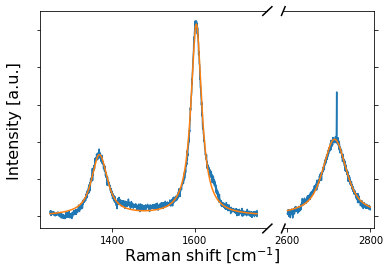

            D           PD         WD        FD          G           PG  \
0  163.271262  1369.717059  25.401194  0.783026  515.25015  1603.354265   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  15.579776  1.0  206.861159  2713.707668  39.539429  0.676539  3.155792   

        2DG  
0  0.401477  
[3.15579205]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

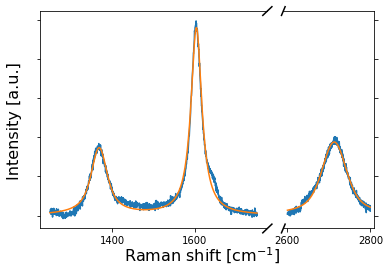

            D           PD         WD        FD           G           PG  \
0  171.645469  1368.979655  26.660693  0.757946  479.743324  1603.480098   

          WG   FG          2D          P2D        W2D      F2D        GD  \
0  15.949486  1.0  188.394461  2712.966787  43.804034  0.55066  2.794966   

        2DG  
0  0.392698  
[2.79496643]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

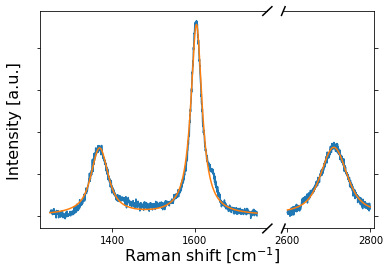

            D      PD         WD        FD           G           PG  \
0  159.543561  1370.0  27.900974  0.757872  454.176704  1603.619991   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  16.252258  1.0  163.070995  2712.041431  45.469053  0.592617  2.846725   

        2DG  
0  0.359047  
[2.84672538]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

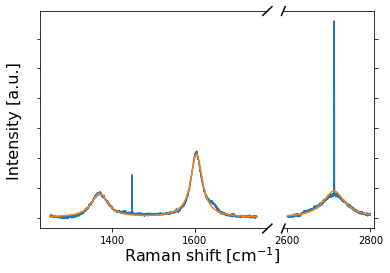

            D      PD         WD        FD           G           PG  \
0  158.442053  1370.0  27.239713  0.783379  424.935359  1603.790332   

          WG        FG          2D          P2D       W2D  F2D        GD  \
0  16.708439  0.999996  178.452664  2712.244533  31.54287  1.0  2.681961   

        2DG  
0  0.419952  
[2.6819607]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the

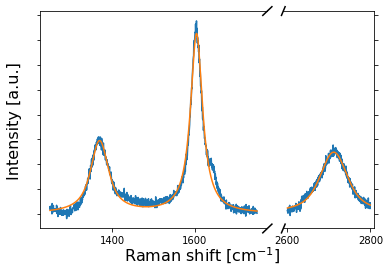

            D      PD        WD        FD           G           PG        WG  \
0  145.627631  1370.0  29.02565  0.777777  361.384382  1603.887288  17.57009   

         FG          2D          P2D        W2D       F2D        GD       2DG  
0  0.999998  124.295752  2711.818585  47.243211  0.631632  2.481565  0.343943  
[2.48156467]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the i

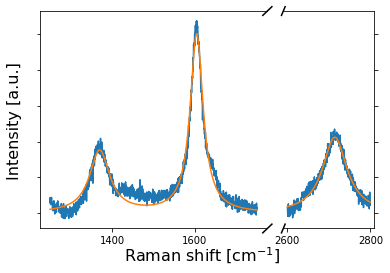

           D      PD         WD        FD           G           PG         WG  \
0  86.755947  1370.0  29.478978  0.995423  249.033401  1604.194607  18.979677   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  106.052022  2714.288955  35.563952  1.0  2.870505  0.425855  
[2.87050524]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

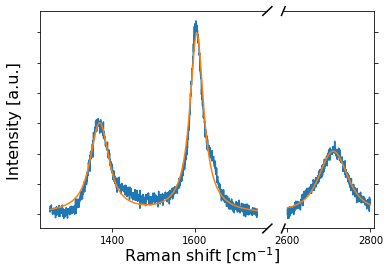

            D      PD         WD        FD           G           PG  \
0  149.007788  1370.0  29.870731  0.823615  297.191402  1604.438885   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  20.080209  1.0  104.366665  2710.730507  48.675939  0.649883  1.994469   

        2DG  
0  0.351177  
[1.99446892]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

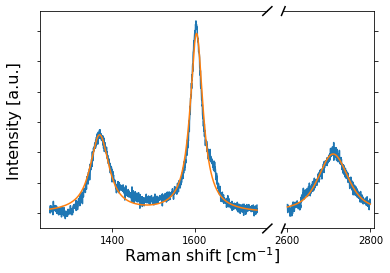

            D      PD         WD        FD           G           PG  \
0  127.150084  1370.0  29.083799  0.878946  293.673329  1603.901401   

          WG        FG         2D          P2D        W2D       F2D        GD  \
0  18.747464  0.999995  97.553985  2710.489896  51.295121  0.609767  2.309659   

        2DG  
0  0.332185  
[2.30965893]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Pop

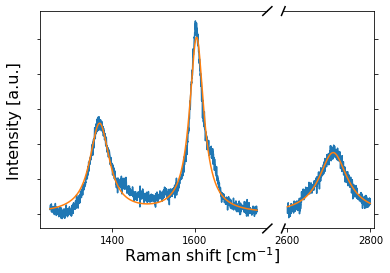

            D      PD         WD        FD           G          PG         WG  \
0  127.931376  1370.0  29.749137  0.916955  250.657707  1604.12231  20.663148   

    FG        2D         P2D        W2D  F2D        GD       2DG  
0  1.0  87.90205  2710.50317  41.144872  1.0  1.959314  0.350686  
[1.95931377]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace fro

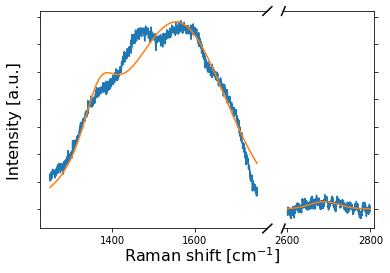

             D           PD    WD   FD    G   PG   WG   FG          2D  \
0  1595.248689  1369.999846  60.0  1.0  0.0  0.0  0.0  0.0  132.591792   

           P2D        W2D           F2D   GD  2DG  
0  2689.218448  59.277834  4.125182e-10  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


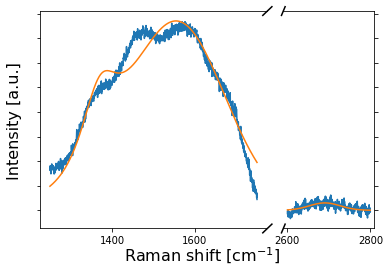

             D      PD    WD   FD    G   PG   WG   FG          2D  \
0  1808.549427  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  150.981691   

           P2D        W2D           F2D   GD  2DG  
0  2690.279679  62.065771  3.627537e-11  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


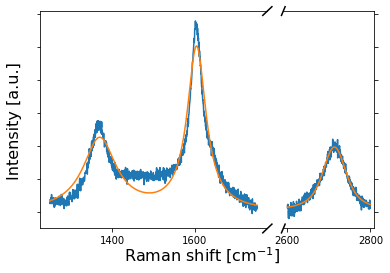

            D      PD         WD   FD           G           PG        WG   FG  \
0  219.627861  1370.0  48.549555  1.0  493.494778  1603.971057  27.41349  1.0   

           2D          P2D        W2D       F2D        GD       2DG  
0  196.768293  2713.472147  40.074214  0.653958  2.246959  0.398724  
[2.24695891]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

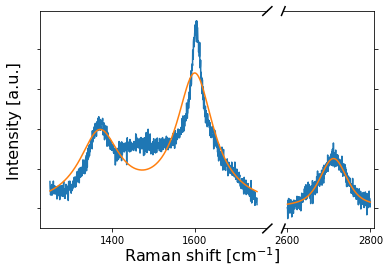

            D      PD    WD   FD           G           PG         WG   FG  \
0  181.107798  1370.0  60.0  1.0  328.702946  1599.938463  54.143111  1.0   

           2D      P2D        W2D      F2D        GD       2DG  
0  125.363658  2711.24  47.350871  0.55151  1.814957  0.381389  
[1.81495744]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and 

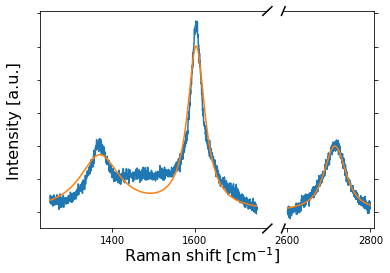

            D      PD         WD   FD           G           PG         WG  \
0  168.288066  1370.0  59.999992  1.0  491.416226  1603.076854  25.646268   

    FG          2D          P2D       W2D       F2D       GD       2DG  
0  1.0  200.329971  2714.740069  36.36506  0.716135  2.92009  0.407658  
[2.92008956]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

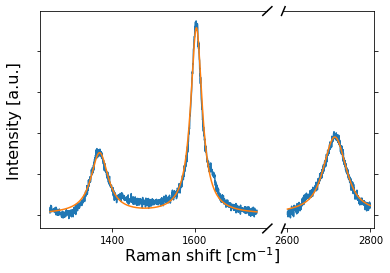

            D      PD         WD        FD           G           PG  \
0  149.024611  1370.0  26.247688  0.920841  455.212944  1603.535246   

          WG   FG          2D         P2D        W2D       F2D        GD  \
0  16.777209  1.0  189.802045  2714.31737  37.216212  0.729521  3.054616   

        2DG  
0  0.416952  
[3.05461588]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

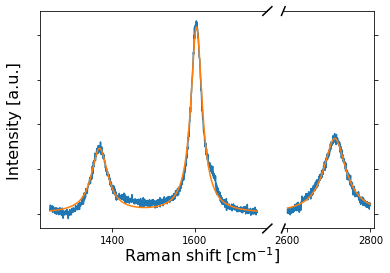

            D      PD         WD        FD           G           PG  \
0  144.134639  1370.0  25.317572  0.888382  416.336849  1603.769757   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  16.700165  1.0  168.473911  2714.279249  32.547017  0.999999  2.888527   

        2DG  
0  0.404658  
[2.88852736]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

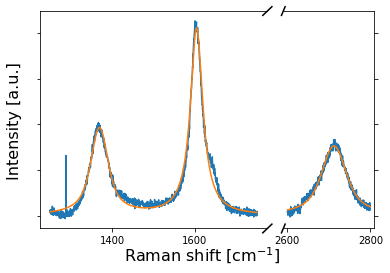

            D           PD         WD       FD           G           PG  \
0  190.937921  1369.677707  29.408069  0.68435  409.728125  1604.015419   

          WG   FG        2D          P2D        W2D       F2D        GD  \
0  18.111348  1.0  152.9645  2712.329643  42.224498  0.670696  2.145871   

        2DG  
0  0.373332  
[2.14587089]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populat

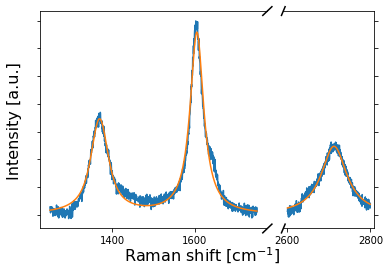

           D      PD         WD        FD           G           PG         WG  \
0  170.71516  1370.0  28.145094  0.819895  327.081655  1604.695848  19.793555   

    FG          2D         P2D        W2D  F2D       GD       2DG  
0  1.0  123.481168  2712.40329  37.328492  1.0  1.91595  0.377524  
[1.91594967]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

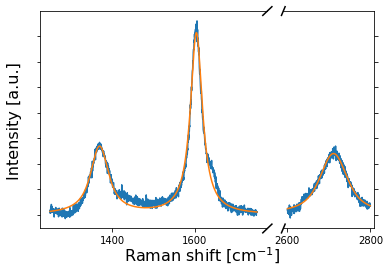

           D      PD         WD        FD           G           PG         WG  \
0  132.63231  1370.0  28.248967  0.862784  354.995782  1603.542853  17.481836   

         FG          2D          P2D        W2D       F2D        GD       2DG  
0  0.999999  120.029302  2711.329128  46.218393  0.684033  2.676541  0.338115  
[2.67654074]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the

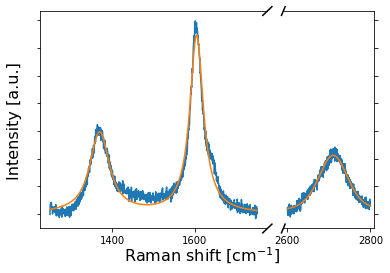

            D      PD         WD      FD           G           PG         WG  \
0  146.487754  1370.0  29.912796  0.9057  321.448185  1604.064853  19.893839   

         FG          2D         P2D        W2D       F2D        GD      2DG  
0  0.999999  106.331881  2710.49155  53.278723  0.488687  2.194369  0.33079  
[2.19436899]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the inter

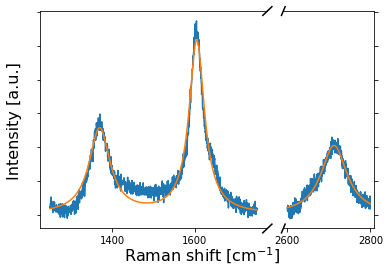

            D      PD         WD        FD           G          PG         WG  \
0  126.536579  1370.0  30.753132  0.999969  256.791681  1604.37325  22.611461   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  102.628665  2712.433264  37.990786  1.0  2.029387  0.399657  
[2.02938694]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

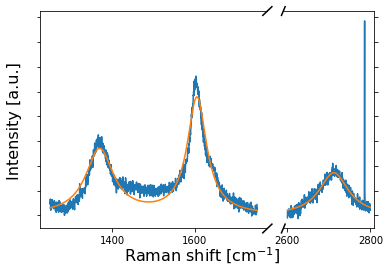

            D      PD         WD   FD           G           PG         WG  \
0  132.217463  1370.0  40.776104  1.0  235.305222  1604.827621  28.402162   

         FG         2D       P2D        W2D  F2D        GD       2DG  
0  0.999999  86.214881  2711.969  42.656926  1.0  1.779683  0.366396  
[1.77968339]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
experiment:  143 :Patterning not done
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper',

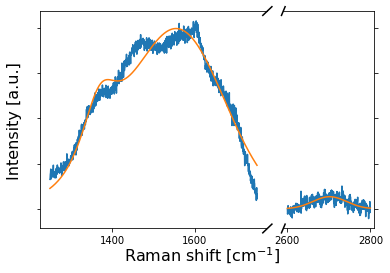

            D      PD    WD   FD    G   PG   WG   FG          2D          P2D  \
0  912.266505  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  134.967011  2701.982318   

         W2D           F2D   GD  2DG  
0  67.402842  3.425713e-10  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


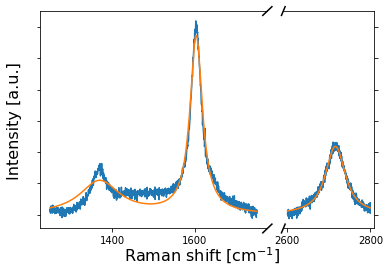

            D      PD         WD   FD           G           PG         WG  \
0  106.811921  1370.0  58.615467  1.0  566.485067  1603.082782  18.172294   

    FG          2D         P2D        W2D       F2D        GD       2DG  
0  1.0  218.381135  2715.77348  31.102817  0.843758  5.303575  0.385502  
[5.30357529]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

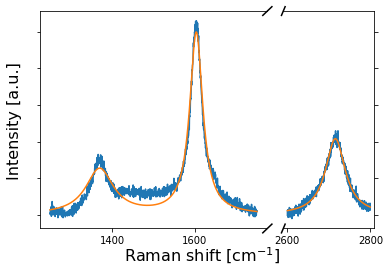

            D      PD        WD   FD           G           PG         WG   FG  \
0  124.759364  1370.0  40.62462  1.0  495.675378  1603.214248  19.236581  1.0   

           2D          P2D        W2D  F2D        GD       2DG  
0  208.211822  2715.677749  28.854022  1.0  3.973051  0.420057  
[3.9730515]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from num

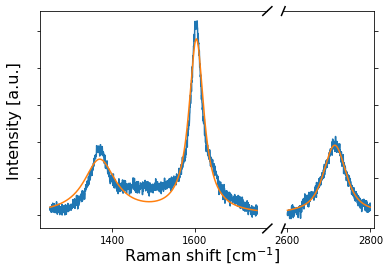

            D           PD         WD   FD           G           PG  \
0  148.211975  1369.999998  46.692296  1.0  473.948931  1603.417773   

          WG   FG          2D          P2D        W2D       F2D        GD  \
0  21.827781  1.0  190.198117  2714.245407  37.827237  0.687307  3.197778   

        2DG  
0  0.401305  
[3.19777758]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating 

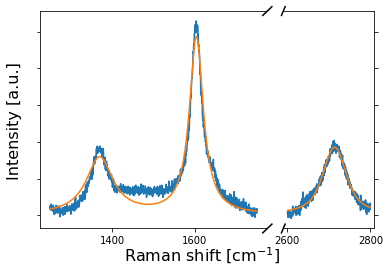

            D      PD         WD   FD           G           PG         WG  \
0  156.078337  1370.0  39.110507  1.0  482.843837  1603.464528  20.372527   

         FG          2D          P2D        W2D       F2D        GD       2DG  
0  0.999999  185.280499  2713.815497  40.366835  0.627926  3.093599  0.383728  
[3.09359933]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interac

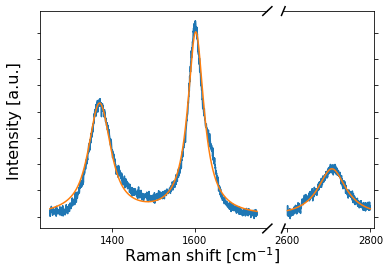

            D      PD         WD        FD           G           PG  \
0  212.558443  1370.0  35.313223  0.813073  347.351543  1602.051127   

          WG        FG         2D          P2D        W2D  F2D        GD  \
0  23.722741  0.999999  91.115185  2707.491304  41.275948  1.0  1.634146   

        2DG  
0  0.262314  
[1.63414606]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

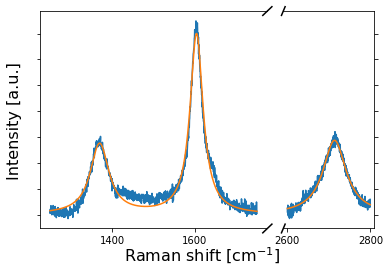

            D      PD         WD        FD         G          PG         WG  \
0  135.946859  1370.0  28.100341  0.947867  348.4043  1603.90591  19.087711   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  143.698536  2713.738611  33.843164  1.0  2.562798  0.412448  
[2.56279772]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace f

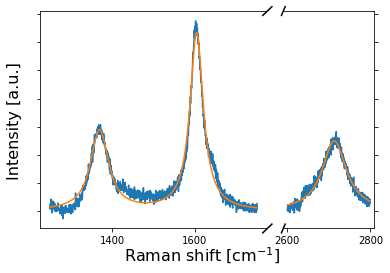

            D      PD         WD        FD          G           PG         WG  \
0  142.656042  1370.0  28.122675  0.875829  315.68562  1604.115267  19.502401   

         FG          2D         P2D        W2D  F2D        GD       2DG  
0  0.999999  124.893737  2713.01851  35.318806  1.0  2.212914  0.395627  
[2.21291448]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive

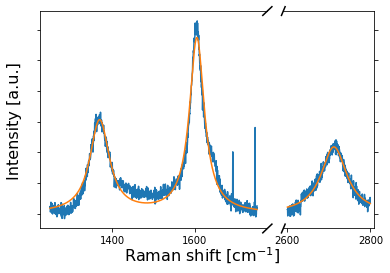

            D      PD         WD        FD           G          PG         WG  \
0  150.920538  1370.0  29.579456  0.921209  284.963429  1604.74816  21.832095   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  109.000811  2712.239769  37.410691  1.0  1.888169  0.382508  
[1.88816865]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

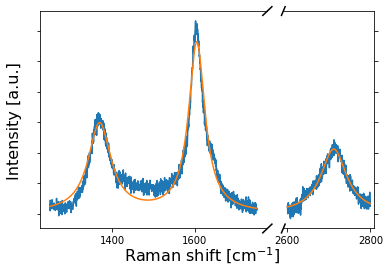

            D      PD         WD        FD           G           PG  \
0  146.324709  1370.0  33.325317  0.999975  279.063113  1604.486076   

          WG   FG          2D          P2D        W2D  F2D       GD       2DG  
0  23.911443  1.0  105.741668  2711.801256  37.610035  1.0  1.90715  0.378917  
[1.90714962]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespa

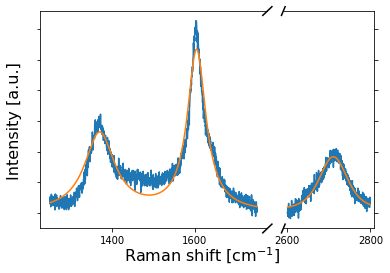

            D      PD         WD   FD          G           PG         WG   FG  \
0  128.950774  1370.0  44.022068  1.0  262.91948  1604.059606  27.108258  1.0   

          2D          P2D        W2D       F2D        GD       2DG  
0  91.829052  2710.972825  49.011396  0.623777  2.038914  0.349267  
[2.03891355]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

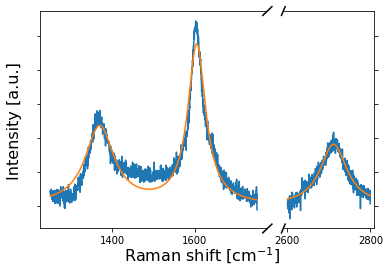

            D      PD       WD   FD           G           PG         WG   FG  \
0  115.566794  1370.0  42.2468  1.0  235.204193  1604.317163  26.137202  1.0   

         2D          P2D        W2D  F2D        GD       2DG  
0  90.74243  2711.449642  39.109828  1.0  2.035223  0.385803  
[2.03522296]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy an

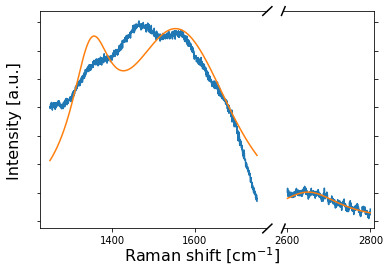

             D           PD    WD   FD    G   PG   WG   FG           2D  \
0  4602.317856  1349.982768  60.0  1.0  0.0  0.0  0.0  0.0  1019.053663   

      P2D        W2D      F2D   GD  2DG  
0  2650.0  95.094342  0.98011  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


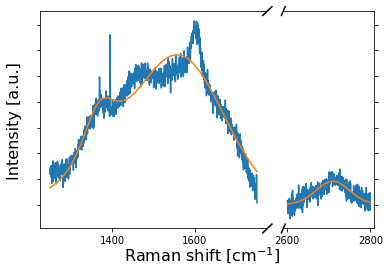

            D          PD    WD   FD    G   PG   WG   FG         2D  \
0  289.309768  1369.36627  60.0  1.0  0.0  0.0  0.0  0.0  92.101652   

           P2D        W2D       F2D   GD  2DG  
0  2709.711018  66.618616  0.098681  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


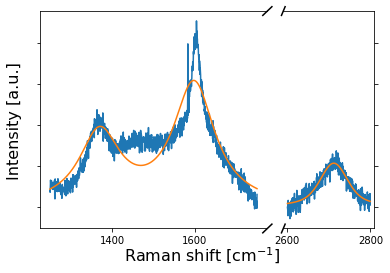

           D      PD    WD   FD           G           PG         WG   FG  \
0  177.12251  1370.0  60.0  1.0  297.454958  1597.712733  60.912649  1.0   

         2D          P2D        W2D       F2D        GD      2DG  
0  107.4466  2712.048231  49.706805  0.525839  1.679374  0.36122  
[1.67937411]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy an

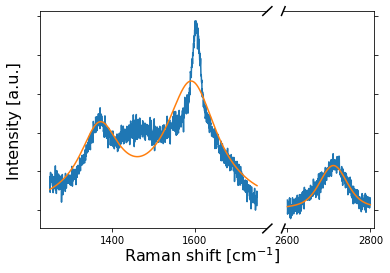

            D      PD    WD   FD           G           PG         WG   FG  \
0  195.192233  1370.0  60.0  1.0  319.736441  1591.733662  74.887908  1.0   

           2D          P2D        W2D       F2D        GD       2DG  
0  115.306101  2710.997659  50.367641  0.474353  1.638059  0.360629  
[1.63805924]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from 

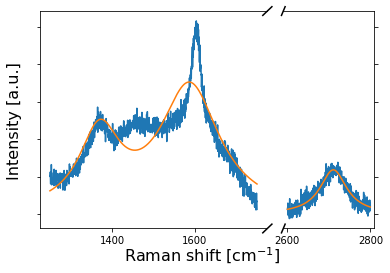

            D           PD    WD   FD           G           PG         WG  \
0  206.034631  1369.999999  60.0  1.0  338.100976  1587.372933  87.233509   

    FG          2D          P2D        W2D  F2D        GD       2DG  
0  1.0  118.509953  2710.854586  39.192341  1.0  1.640991  0.350516  
[1.640991]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from nu

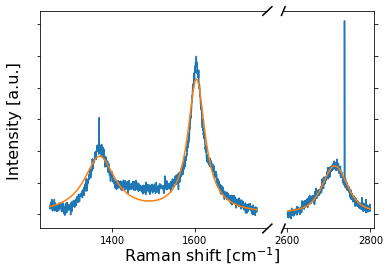

            D      PD         WD   FD           G           PG         WG  \
0  178.567133  1370.0  45.382939  1.0  420.584987  1603.706884  25.283091   

    FG          2D          P2D        W2D       F2D        GD       2DG  
0  1.0  152.874973  2714.336907  44.014215  0.524529  2.355333  0.363482  
[2.35533258]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive names

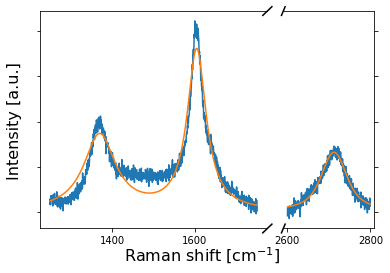

            D           PD         WD   FD           G           PG  \
0  168.948693  1369.999999  46.722836  1.0  355.240805  1604.195937   

          WG   FG          2D         P2D        W2D       F2D        GD  \
0  27.616176  1.0  132.147033  2712.51847  43.339792  0.662432  2.102655   

        2DG  
0  0.371993  
[2.10265495]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating th

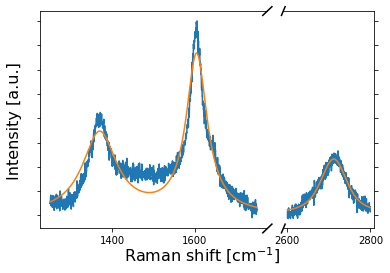

            D      PD         WD   FD           G           PG         WG  \
0  167.931278  1370.0  50.424636  1.0  326.559099  1604.040257  30.557107   

    FG          2D          P2D        W2D       F2D      GD       2DG  
0  1.0  116.005404  2711.840785  44.429147  0.685115  1.9446  0.355236  
[1.94459962]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace

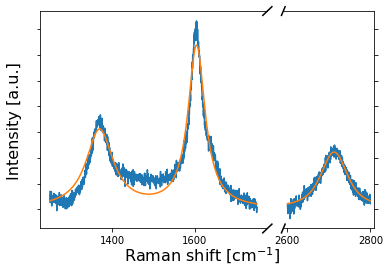

            D      PD        WD   FD        G           PG         WG   FG  \
0  152.703859  1370.0  39.72436  1.0  314.643  1603.931896  25.019839  1.0   

           2D          P2D        W2D       F2D        GD       2DG  
0  111.223602  2712.724944  44.271691  0.724036  2.060478  0.353491  
[2.06047838]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace fro

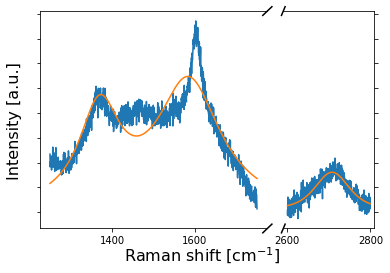

            D      PD    WD   FD           G           PG         WG   FG  \
0  195.022374  1370.0  60.0  1.0  259.282351  1584.653388  93.585797  1.0   

          2D          P2D       W2D       F2D        GD       2DG  
0  80.395978  2707.711341  58.86629  0.685865  1.329501  0.310071  
[1.32950053]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from nump

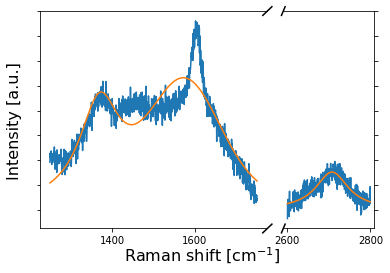

            D      PD    WD   FD    G   PG   WG   FG         2D          P2D  \
0  201.261364  1370.0  60.0  1.0  0.0  0.0  0.0  0.0  76.035235  2707.662446   

         W2D  F2D   GD  2DG  
0  47.701944  1.0  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


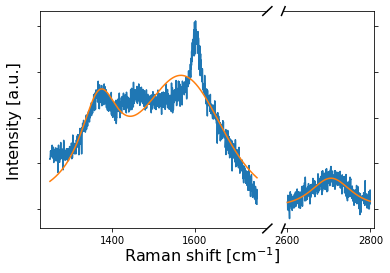

            D          PD    WD   FD    G   PG   WG   FG        2D  \
0  213.296156  1369.99959  60.0  1.0  0.0  0.0  0.0  0.0  67.70594   

           P2D       W2D       F2D   GD  2DG  
0  2705.060023  65.63606  0.738981  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Experiment Completed

Found the .spe file...
Image saved to C:\Users\labuser\Desktop\data\Raman\Vivek\2019-10-08
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


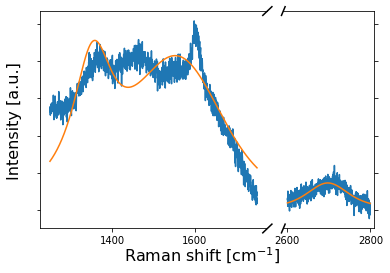

           D           PD    WD   FD    G   PG   WG   FG         2D  \
0  363.82671  1353.692865  60.0  1.0  0.0  0.0  0.0  0.0  72.928755   

           P2D        W2D       F2D   GD  2DG  
0  2697.533724  70.960023  0.703919  0.0  inf  
[0.]
None
{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}


In [18]:
from __future__ import division
import pandas as pd

import time
import os
os.chdir("C:\\Users\\labuser")
df=pd.read_csv("dataset-2.csv")
df.head()
power_of_file=df["power"]
time_of_file=df["time"]

#initialize position
print("Initializing starts\n")
# x.position=4
# y.position=5
# z.position=3.25


pos_x=[]
pos_y=[]
import numpy as np
p=2
p2=2
print("Enter the (y1,x1) coordinate")
co=[float(p) for p in input().split()]


print("Enter the (y2,x2) coordinate")
co1=[float(p2) for p2 in input().split()]



print("Enter the step size of y, then x")
s=2
step=[float(s) for s in input().split()]


pos_x=np.arange(co[0],co1[0]+step[0],step[0])
pos_y=np.arange(co[1],co1[1]+step[1],step[1])

        
print(pos_x)
print(pos_y)

position=[]
for i in range(len(pos_y)):
    for j in range(len(pos_x)):
        position.append([pos_x[j],pos_y[i]])



mirror('off') #make sure mirror is off
laser_power.power=0.01   #make sure laser power is down to 0.01 W
print("\nPatterning will be started within 10 seconds\n")
time.sleep(10)





print("\nPatterning Starts\n")
#position=[[2,4],[2,3],[3,4],[3,3]]
















for i in range(len(pos_x)*len(pos_y)):
    if i>=10:
        import rpy2.robjects as robjects
        robjects.r('''
        suppressWarnings({suppressMessages({
          library(mlrMBO)
          library(ggplot2)
        })})

        ps = makeParamSet(
          makeIntegerParam("power", lower = 10, upper = 2000),
          makeIntegerParam("time", lower = 500, upper = 10000),
          makeDiscreteParam("gas", values = c("Argon")),
          makeIntegerParam("pressure", lower = 920, upper = 930)
        )

        ctrl = makeMBOControl(y.name = "ratio")
        ctrl = setMBOControlInfill(ctrl, opt = "focussearch", opt.focussearch.maxit = 10, opt.focussearch.points = 10000, crit = makeMBOInfillCritEI())

        data=read.csv("dataset-2.csv")
        data<-na.omit(data)
        suppressMessages({opt.state = initSMBO(par.set = ps, design = data, control = ctrl, minimize = FALSE, noisy = TRUE)})
        print("Proposed parameters:")
        prop = suppressWarnings({proposePoints(opt.state)})
        print(prop$prop.points)
        x<-prop$prop.points
        write.table(x, file = "dataset-2.csv", sep = ",", append = TRUE, quote = FALSE,col.names = FALSE, row.names = FALSE)
        ''')
        
        
    df=pd.read_csv("dataset-2.csv")
    power_of_file=df["power"]
    time_of_file=df["time"]

    x.position=position[i][0]
    y.position=position[i][1]
    time.sleep(10)
    a=power_of_file[i]
#     b=float(a/1e3)
#     laser_power.power=b
    laser_power.power=((a-2.7979)/0.4639)/1000
    time.sleep(15)
    mirror('on') #irradiation begins
    
    
    t=time_of_file[i] 
    laser_time=float(t/1e3)
    time.sleep(laser_time+1) #exposure time
    
    mirror('off')
    time.sleep(5)
    laser_power.power=0.01
    time.sleep(4)
    
    #begin capturing spectra
    mirror("on")
    capture_photo("on",i)
    mirror("off")
    time.sleep(5)
    
    
        

## (G)
**The following capture_photo function is called from the main program to power the spectrometer camera, capture the photos for raman analysis.**


**After capturing 2 foreground pictures at wavenumber 1500 and 2700, 2 corresponding .spe files are saved. After reading them 2 different csv files are saved recording the wavelength and intensity data**

**The csv files are further sent into ration function, where some fittings are done, G/D ratio is measured and some other properties as well**


In [12]:

from fit_code2 import ration

def capture_photo(begin,exp_no):
    if begin=="on":
        def set_value(setting, value):    
        # Check for existence before setting
        # gain, adc rate, or adc quality
            if experiment.Exists(setting):
                experiment.SetValue(setting, value)

        def experiment_completed(sender, event_args):    
            print("Experiment Completed")    
            # Sets the state of the event to signaled,
            # allowing one or more waiting threads to proceed.
            acquireCompleted.Set()

        import time

        # Check for device and inform user if one is needed
        if (device_found()==True): 
            experiment.ExperimentCompleted += experiment_completed 
            # Check this location for saved spe after running
            #print("Please Enter the Exposure Time:\n")
            #x=int(input())
            set_value(CameraSettings.ShutterTimingExposureTime,3000)
            #print("Please Enter the Number of Frames")
            #y=int(input())
            experiment.SetValue(ExperimentSettings.AcquisitionFramesToStore,5)
            for k in range(1,3):
                if k==1:
                    experiment.SetValue(SpectrometerSettings.GratingCenterWavelength,578.1351880026082)
                elif k==2:
                    experiment.SetValue(SpectrometerSettings.GratingCenterWavelength,621.2340604418703)
                _file_name = "case"

                # Pass location of saved file
                save_file(_file_name)

                # Acquire image
                experiment.Acquire()
                time.sleep(35)
                directory="C:\\Users\\labuser\\Desktop\\data\\Raman\\Vivek\\2019-10-08"
                if( os.path.exists(directory)):        
                        print("\nFound the .spe file...")        

                        # Returns all .spe files
                        files = glob.glob(directory +'/*.spe')

                        # Returns recently acquired .spe file
                        last_image_acquired = max(files, key=os.path.getctime)

                        try:
                            # Open file
                            file_name = file_manager.OpenFile(
                                last_image_acquired, FileAccess.Read)

                            # Access image
                            file=file_name
                            imageData = file.GetFrame(0,0)
                            #here is a problem 11-18-2019
                            n=5
                            intensity_frame=np.zeros((n,1340))
                            # Get image data
                            buffer = imageData.GetData()
                            #buffer=imageData.GetDataBuffer()
                            # Print first 10 pixel intensities
                            for i in range(0,n):
                                imageData=file.GetFrame(0,i)
                                buffer=imageData.GetData()
                                for pixel in range(0,1340):
                                    intensity_frame[i][pixel]=buffer[pixel]

                            file_name.Dispose()


                        except IOError:
                            print ("Error: can not find file or read data")

                else:
                    print(".spe file not found...")

                print(String.Format("{0} {1}",
                                    "Image saved to",
                                    experiment.GetValue(
                                        ExperimentSettings.
                                        FileNameGenerationDirectory)))  


                wl= experiment.SystemColumnCalibration
                wavelength=np.zeros((1,1340))
                for i in range(1340):wavelength[0,i]=wl[i]
                #print(intensity_frame)
                intensity=np.zeros((1,1340))
                for i in range(1340):
                    x=0
                    for j in range(n):
                        x=x+intensity_frame[j][i]
                    x=x/n
                    intensity[0,i]=x
                    check_intensity=x

                w=[]
                inten=[]

                for x in range(1340):
                    wavelength[0,x]=1e7*(1/532 - 1/wavelength[0,x])
                    w.append(wavelength[0,x])
                    inten.append(intensity[0,x])
                import csv
          
                m="Point "+str(exp_no)+" foreground"+str(k)+"D.csv"
                with open(m, 'w', newline='') as f:
                    writer = csv.writer(f)
                    writer.writerow(["W", "I"])
                    writer.writerows(zip(w,inten))
        
        if check_intensity>=40e3:
            print("experiment: ",exp_no, ":Patterning not done")
            
        elif check_intensity<40e3:
            print(ration(m1,m2,exp_no)) 
        

**The following codes are some random stuff**

In [ ]:
# import matplotlib.pyplot as plt
# os.chdir("C:\\Users\\labuser\\Experiment1")
# bgr = pd.read_csv('back.csv', header = 0, index_col = 0, names = ['W', 'I'])
# plt.plot(bgr)
# plt.show()
from __future__ import division
import pandas as pd

import os
os.chdir("C:\\Users\\labuser")
df=pd.read_csv("dataset-2.csv")
df.head()
power_of_file=df["Power"]
time_of_file=df["Time"]


import time
x.position=9
y.position=4
time.sleep(8)

a=power_of_file[0]
b=float(a/1e3)
laser_power.power=b
time.sleep(10)
mirror('on') #irradiation begins


t=time_of_file[0] 
laser_time=float(t/1e3)
time.sleep(laser_time+1) #exposure time

mirror('off')
time.sleep(5)
laser_power.power=0.01
time.sleep(4)

In [ ]:
x.position=4
y.position=4
z.position=.44

In [ ]:
mirror("on")


In [ ]:
FTDIresources = listDevices()
FTDIresources
serial = FTDIresources[1]
print(serial)


In [ ]:
mirror("on")

In [ ]:
print(ration(1,2,3)) 

In [16]:
mirror("off")

{'type': 5, 'id': 67369712, 'description': b'APT Filter Flipper', 'serial': b'37000805'}


In [11]:
laser_power.power=0.01

In [19]:
print(len(pos_x)*len(pos_y))

169
